In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import glob
from scipy.stats import norm


import io
import base64
from IPython.display import display, HTML


%matplotlib widget

In [24]:

dark = np.load(r'C:\Users\mpwhe\OneDrive\Documenten\BEP\BEP data\LT361chip4\S21_w1_blue_10h34_11-10-2024_dark.npy')
freqs = np.load(r'C:\Users\mpwhe\OneDrive\Documenten\BEP\BEP data\LT361chip4\S21_w1_blue_10h34_11-10-2024_freqs.npy')
sweep = np.loadtxt('VNAsweep.dat')


dir = r'C:\Users\mpwhe\OneDrive\Documenten\BEP\BEP data\LT361chip4 trimmed\LT361chip4 trimmed\S21\S21\Power/'
df = S21.loop_over_S21_files(dir, kid=None, pread=116, plot= None)
display(df)
f0s = np.array(df['f0'])
# Qc_meas_hist = np.array(df['Qc'])
# print(Qc_meas_hist)
# print(Qc_meas_hist.shape)

master_array = np.loadtxt(r'C:\\Users\\mpwhe\\OneDrive\\Documenten\\BEP\\BEP data\\LT361chip4\\LT361w2chip4_master.txt', delimiter=',', skiprows=1)
f0_meas = master_array[:, 9]
freqs_design = master_array[:,7]


c:\Users\mpwhe\OneDrive\Documenten\BEP\BEP data\.venv\lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
c:\Users\mpwhe\OneDrive\Documenten\BEP\BEP data\LT361chip4 trimmed\LT361chip4 trimmed\KID_S21.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\mpwhe\OneDrive\Documenten\BEP\BEP data\.venv\lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
c:\Users\mpwhe\OneDrive\Do

,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,dw,redchisqr
0,100,-116.0,0.099981,5.122135,1.649237e-07,33677.778379,68.618930,36696.501349,98.988778,409397.169484,12170.734626,-76.070877,-1.862215e-05,0.000036
1,101,-116.0,0.099968,5.131339,1.499202e-07,54140.065300,163.637218,60292.585420,220.166691,530554.057258,17259.274657,-74.103762,-2.567904e-07,0.000046
2,102,-116.0,0.100033,5.144070,1.620577e-07,37171.629855,82.968111,40144.914735,135.893731,501886.624241,21026.071887,-75.603572,-2.962673e-05,0.000046
3,103,-116.0,0.099972,5.154333,1.511370e-07,52851.271275,156.543118,59839.898766,204.526971,452537.315309,11930.885366,-74.280298,-3.202476e-06,0.000045
4,104,-116.0,0.100084,5.167728,1.758515e-07,37530.622586,90.950668,34803.555874,160.557312,-478975.858679,22254.098545,-74.900020,3.404400e-05,0.000052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,96,-116.0,0.099985,5.091325,1.137602e-07,50739.936407,110.267022,57063.688388,150.402895,457862.346334,9820.232712,-74.428099,-1.124603e-05,0.000027
389,97,-116.0,0.100019,5.099489,1.350441e-07,44828.082272,100.674342,49523.975895,137.626949,472767.282244,12578.760587,-74.888651,5.107325e-06,0.000030
390,98,-116.0,0.099962,5.107336,1.348331e-07,47643.447441,113.842821,53305.154483,151.504279,448564.594926,10843.241678,-74.679127,-4.104715e-06,0.000033
391,99,-116.0,0.100066,5.111936,1.300795e-07,46678.432133,105.169927,51377.126869,146.922496,510397.858314,14538.576905,-74.696872,7.984661e-06,0.000030


[[ 4.         29.55174255  0.5872711 ]
 [ 4.00003125 29.5174408   0.59093574]
 [ 4.0000625  29.4991169   0.58508497]
 ...
 [ 8.4999375  15.50176907 -1.18731245]
 [ 8.49996875 15.54568386 -1.18122286]
 [ 8.5        15.50576973 -1.17718658]]


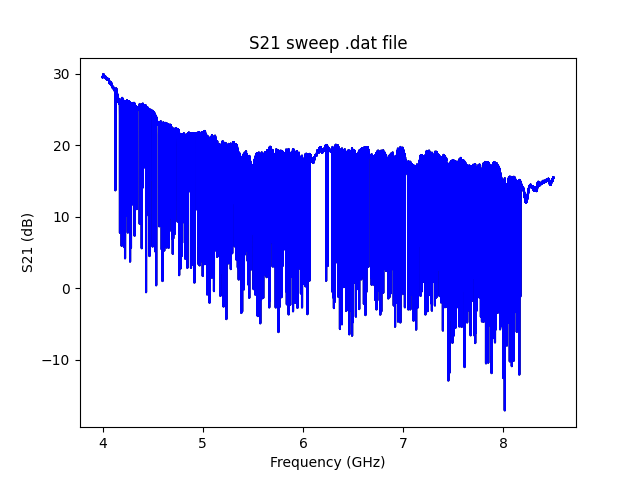

In [25]:

# print(f0s)
# print(f0s[0])

print(sweep)
# print(sweep[:, 0])

# ff swithc punt vinden en dan keer min 1 doen
# 128021
freqs_sweep = sweep[:,0]
dark_sweep = sweep[:,1]

plt.figure()
plt.plot(freqs_sweep, dark_sweep, label = 'dark', color = 'black')
plt.plot(freqs_sweep[:128020], dark_sweep[:128020], label = 'VA sweep', color = 'blue')
plt.plot(freqs_sweep[128021:], dark_sweep[128021:] , label = 'VA sweep', color = 'blue') #corrected for offset
# plt.axvline(f0s, color = 'red', linestyle = '--', label = 'Labview')
# plt.axvline(f0_meas, color = 'green', linestyle = '--', label = 'Python')
plt.title('S21 sweep .dat file')
plt.ylabel('S21 (dB)') #????
plt.xlabel('Frequency (GHz)')
#plt.xlim(4.95,5.05)
plt.show()

C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\539240636.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig2, ax2 = plt.subplots(figsize = (12,6))


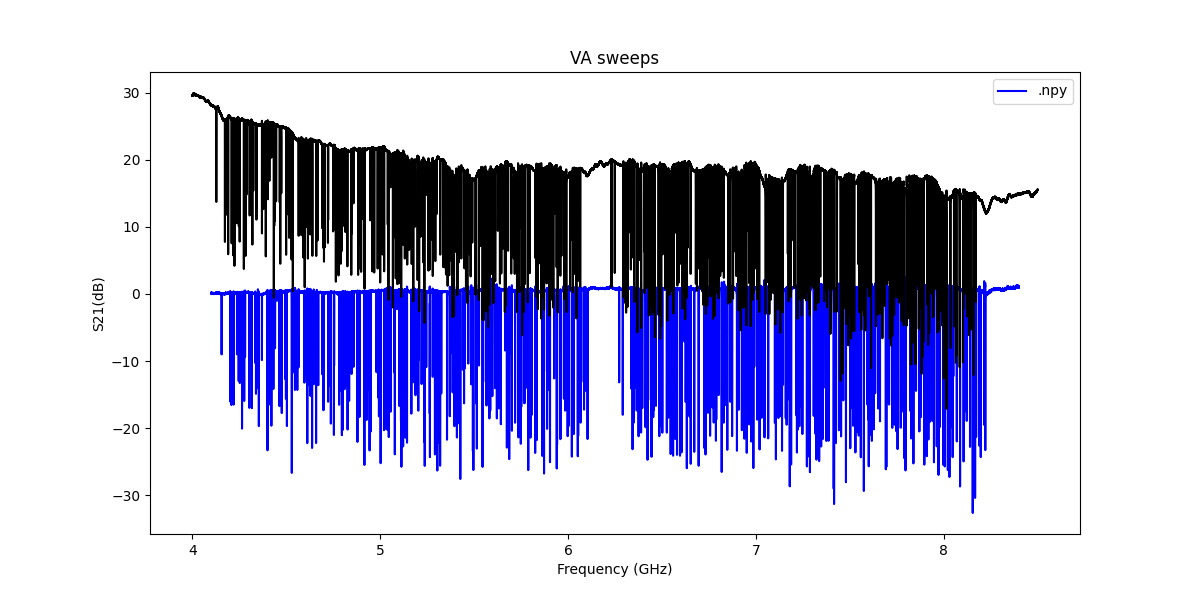

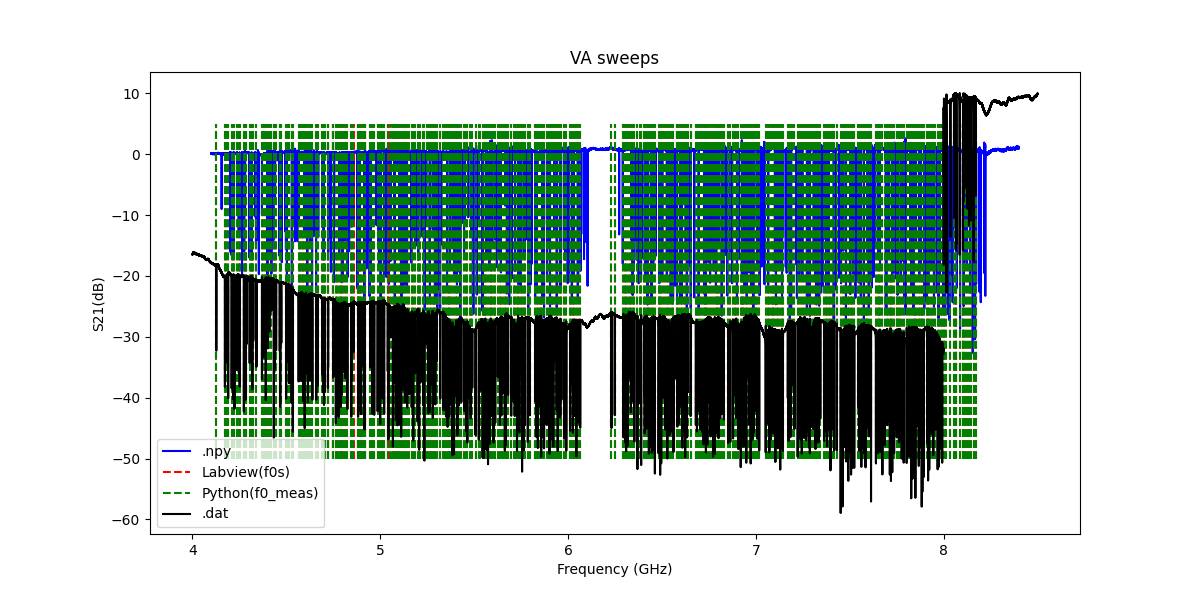

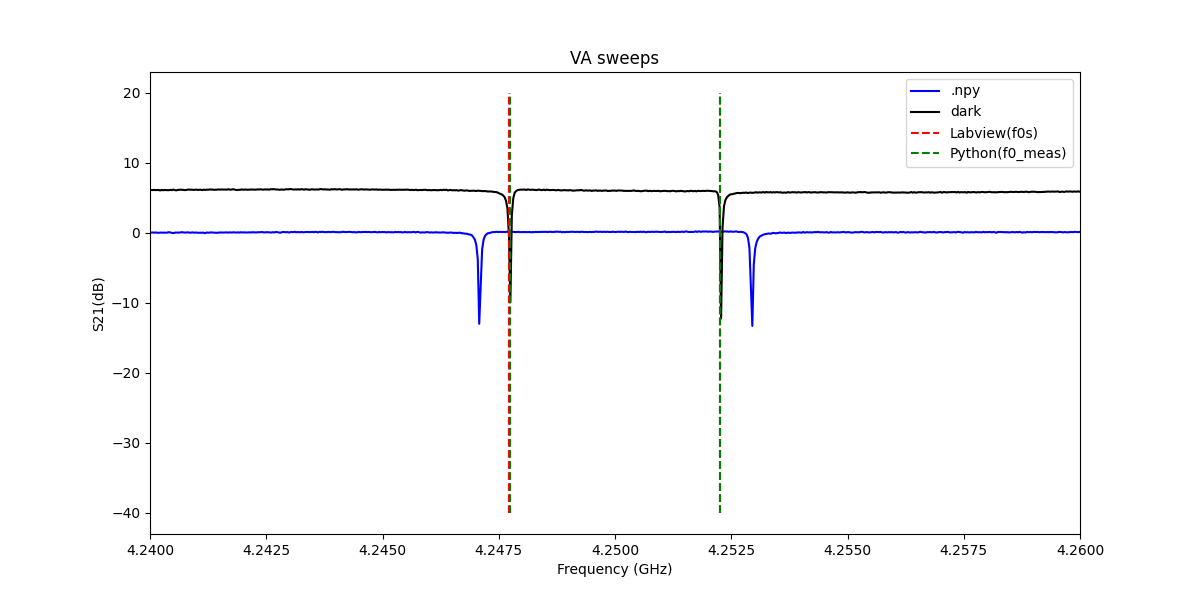

In [26]:

# plt.figure(figsize= (12,6))
# plt.xlim(4.40,4.50)
# plt.plot(freqs, dark)
# plt.axvline(f0s)
# plt.show()
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(freqs, dark, label = '.npy', color = 'blue')
# ax.vlines(f0s, ymin = -50, ymax = 5, color = 'red', linestyle = '--', label = 'Labview(f0s)')
# ax.vlines(f0_meas, ymin = -50, ymax = 5, color='green',linestyle = '--', label = 'Python(f0_meas)')
# ax.plot(freqs_sweep[:128020], dark_sweep[:128020], color = 'black')
# ax.plot(freqs_sweep[128021:], dark_sweep[128021:], label = '.dat', color = 'black')
ax.plot(freqs_sweep, dark_sweep, color = 'black')
#ax.plot(sweep[:, 0], sweep[:, 1], color = 'blue', label = 'VA sweep')
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylabel('S21(dB)') #???
ax.set_title('VA sweeps')
ax.legend()

fig2, ax2 = plt.subplots(figsize = (12,6))
ax2.plot(freqs, dark, label = '.npy', color = 'blue')
ax2.vlines(f0s, ymin = -50, ymax = 5, color = 'red', linestyle = '--', label = 'Labview(f0s)')
ax2.vlines(f0_meas, ymin = -50, ymax = 5, color='green',linestyle = '--', label = 'Python(f0_meas)')
ax2.plot(freqs_sweep[:128020], dark_sweep[:128020]-46, color = 'black')
ax2.plot(freqs_sweep[128021:], dark_sweep[128021:]-5.6, label = '.dat', color = 'black')
#ax2.plot(sweep[:, 0], sweep[:, 1], color = 'blue', label = 'VA sweep')
#ax2.set_xlim(4.24, 4.26)
ax2.set_xlabel('Frequency (GHz)')    
ax2.set_ylabel('S21(dB)') #???
ax2.set_title('VA sweeps')
ax2.legend()

fig1, ax1 = plt.subplots(figsize = (12,6))
ax1.plot(freqs, dark, label = '.npy', color = 'blue')
ax1.plot(freqs_sweep, dark_sweep-20, label = 'dark', color = 'black')
ax1.vlines(f0s, ymin = -40, ymax = 20, color = 'red', linestyle = '--', label = 'Labview(f0s)')
ax1.vlines(f0_meas, ymin = -40, ymax = 20, color='green',linestyle = '--', label = 'Python(f0_meas)')
# ax1.plot(freqs_sweep[:128020], dark_sweep[:128020], color = 'black')
# ax1.plot(freqs_sweep[128021:], dark_sweep[128021:]+33.375, label = '.dat', color = 'black')
#ax1.plot(sweep[:, 0], sweep[:, 1], color = 'blue', label = 'VA sweep')
ax1.set_xlim(4.24, 4.26)
ax1.set_xlabel('Frequency (GHz)')    
ax1.set_ylabel('S21(dB)') #???
ax1.set_title('VA sweeps')
ax1.legend()

In [27]:
print(np.shape(f0_meas))               # f0_meas has 400 values of which some are nans because they couldnt be found
number_nans = np.isnan(f0_meas).sum()
print(f"Number of NaNs in f0_meas: {number_nans}")   # 12 nans in f0_meas (12 keer niet kunnen vinden)
mask = np.isnan(f0_meas)
indices_nans_f0_meas = np.where(mask)[0]
print(f"Indices of NaNs in f0_meas: {indices_nans_f0_meas}")  # indices of nans in f0_meas

print(np.shape(f0s)) # f0s has only 380 values which means some dips are not detected





(400,)
Number of NaNs in f0_meas: 7
Indices of NaNs in f0_meas: [  4  55 132 172 300 355 387]
(393,)


In [28]:
sorted_indices = np.argsort(f0_meas) #f0_meas has 400 values, but some are NaN
sorted_f0_meas = f0_meas[sorted_indices]
sorted_master_array = master_array[sorted_indices] #sort master array according to f0_meas


#f0_meas komt uit de master file en hoort dus bij de python data en komt overeen met de .npy file
# f0s komt uit de labview data en komt overeen met de .dat file 
# De Q's komen uit de labview data en horen dus bij de .dat file

sorted_df = df.sort_values(by= 'f0') #f0s has 380 values, so couldnt find some   
sorted_f0s = sorted_df['f0'] 
print(np.shape(sorted_f0s)) #f0s has 380 values, so couldnt find some
print(sorted_f0s)



(393,)
110    4.127921
221    4.173799
326    4.179542
337    4.191039
348    4.209545
         ...   
319    8.124056
321    8.134120
322    8.145145
323    8.159165
324    8.169498
Name: f0, Length: 393, dtype: float64


In [44]:
# De frequenties hier koppelen zonder een shift uit te voeren
# -- 1. Bereid master-frequenties voor (f0_meas) --

# Zet f0_meas in float-array als dat nog niet is gedaan
f0_meas = np.array(master_array[:, 9], dtype=float)

# -- 2. Verwijder f0_meas-clusters (te dicht bij elkaar) --
min_distance = 0.0005  # GHz
sort_idx = np.argsort(f0_meas)
sorted_f0s = f0_meas[sort_idx]

# Vind te dichte buren
too_close = np.abs(np.diff(sorted_f0s)) < min_distance
invalid_idx = set()

for i, close in enumerate(too_close):
    if close:
        # Voeg beide frequenties toe (voorkant en achterkant)
        invalid_idx.add(sort_idx[i])
        invalid_idx.add(sort_idx[i + 1])

# Masker met True voor geldige f0_meas
valid_f0_mask = np.array([i not in invalid_idx for i in range(len(f0_meas))])

# -- 3. Initialiseer lege kolommen --
extra_data = {
    'KID': np.full(f0_meas.shape, '', dtype=object),
    'f0_Q': np.full(f0_meas.shape, np.nan),
    'Ql': np.full(f0_meas.shape, np.nan),
    'Qc': np.full(f0_meas.shape, np.nan),
    'Qi': np.full(f0_meas.shape, np.nan),
    'dw': np.full(f0_meas.shape, np.nan),
}
gebruikt = np.full(f0_meas.shape, False)

# -- 4. Match alleen geldige f0_meas én als f0_Q > f0_meas --
tolerance = 0.001  # GHz

for _, row in df.iterrows():
    f_q = row['f0']
    verschil = np.abs(f0_meas - f_q)

    # Vind kandidaten: nog niet gebruikt, niet te dicht, binnen tolerantie, én f0 < f_q
    kandidaten = np.where(
        (~gebruikt) &
        valid_f0_mask &
        (verschil <= tolerance) &
        (f0_meas < f_q)
    )[0]

    if len(kandidaten) == 0:
        continue

    # Kies dichtstbijzijnde geldige kandidaat
    idx = kandidaten[np.argmin(verschil[kandidaten])]

    # Vul extra_data
    extra_data['KID'][idx] = row['KID']
    extra_data['f0_Q'][idx] = f_q
    extra_data['Ql'][idx] = row['Ql']
    extra_data['Qc'][idx] = row['Qc']
    extra_data['Qi'][idx] = row['Qi']   
    extra_data['dw'][idx] = row['dw']

    gebruikt[idx] = True

# -- 5. Combineer alles --
extended_master_array = np.column_stack((
    master_array,
    extra_data['KID'],
    extra_data['f0_Q'],
    extra_data['Ql'],
    extra_data['Qc'],
    extra_data['Qi'],
    extra_data['dw']
))

colnames = ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'f0_meas','col7','col8','col9', 'KID', 'f0_Q', 'Ql', 'Qc', 'Qi','dw']
#colnames = ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'f0_meas', 'KID', 'f0_Q', 'Ql', 'Qc', 'Qi', 'dw']
df_extended = pd.DataFrame(extended_master_array, columns=colnames)

# Preview
#print(df_extended.head())
print(df_extended[['KID', 'col7', 'f0_Q', 'Ql', 'Qc', 'Qi','dw']])

# 1. Frequencies die te dicht op elkaar zaten
clustered_f0s = np.sort(f0_meas[list(invalid_idx)])
print("\n⚠️ f0_meas uitgesloten wegens clustering (VenA-ripples):")
print(clustered_f0s)

# 2. Frequencies die niet gekoppeld zijn (geen match gevonden)
ongekoppeld_idx = np.where((~gebruikt) & valid_f0_mask)[0]
ongekoppelde_f0s = f0_meas[ongekoppeld_idx]
print("\n❌ f0_meas niet gekoppeld (geen geldige f0_Q match):")
print(ongekoppelde_f0s)

# Optioneel: aantallen
print(f"\nTotaal aantal uitgesloten door clustering: {len(clustered_f0s)}")
print(f"Aantal niet-gematchte, geldige f0_meas: {len(ongekoppelde_f0s)}")

    KID      col7      f0_Q            Ql            Qc             Qi  \
0         4.15617       NaN           NaN           NaN            NaN   
1     2  4.202063  4.173799  64626.518633  74472.737595  488808.321496   
2     3  4.207842  4.179542   59838.26924  67014.800633  558772.680515   
3     4  4.219745  4.191039     36117.946  39285.731551  447921.713017   
4        4.993571       NaN           NaN           NaN            NaN   
..   ..       ...       ...           ...           ...            ...   
395      8.191332       NaN           NaN           NaN            NaN   
396      8.198675       NaN           NaN           NaN            NaN   
397      8.216365       NaN           NaN           NaN            NaN   
398      8.223389       NaN           NaN           NaN            NaN   
399      8.169994       NaN           NaN           NaN            NaN   

           dw  
0         NaN  
1   -0.000008  
2   -0.000004  
3    0.000001  
4         NaN  
..        ...  

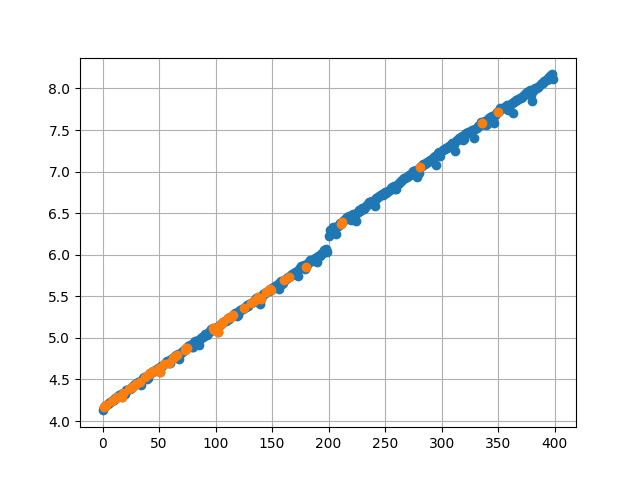

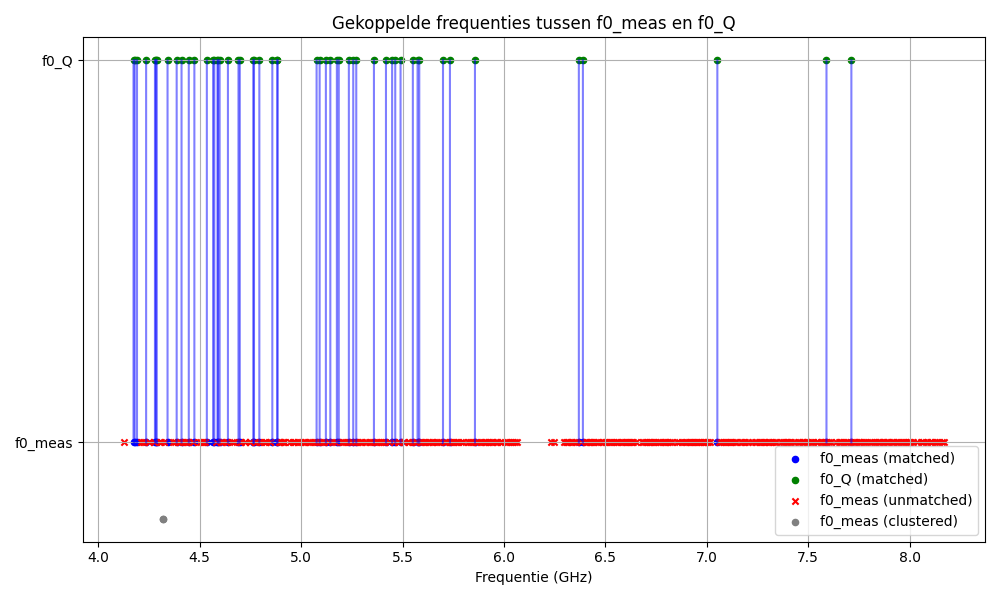

In [45]:
extended_master_array = df_extended.to_numpy()
plt.figure()
plt.plot( extended_master_array[:, 9], 'o', label = 'f0_meas')
plt.plot( extended_master_array[:, 11], 'o', label = 'f0_Q')
plt.grid()
plt.show()



# Zet arrays om voor plotten
f0_meas_array = f0_meas.astype(float)
f0_q_array = np.array(extra_data['f0_Q'], dtype=float)

# 1. Gematchte paren
matched_mask = ~np.isnan(f0_q_array)
matched_f0_meas = f0_meas_array[matched_mask]
matched_f0_q = f0_q_array[matched_mask]

# 2. Niet-gematchte f0_meas
unmatched_f0_meas = f0_meas_array[(~matched_mask) & valid_f0_mask]

# 3. f0_meas uit VenA-clusters
clustered_f0s = f0_meas_array[list(invalid_idx)]

# --- Plot ---
plt.figure(figsize=(10, 6))

# Verbonden lijnen: matched paren
for x, y in zip(matched_f0_meas, matched_f0_q):
    plt.plot([x, y], [0, 1], color='blue', alpha=0.5)

# Punten: matched f0_meas en f0_Q
plt.scatter(matched_f0_meas, np.zeros_like(matched_f0_meas), label='f0_meas (matched)', color='blue', s=20)
plt.scatter(matched_f0_q, np.ones_like(matched_f0_q), label='f0_Q (matched)', color='green', s=20)

# Niet-gematchte f0_meas
plt.scatter(unmatched_f0_meas, np.zeros_like(unmatched_f0_meas), label='f0_meas (unmatched)', color='red', s=20, marker='x')

# Clustered f0_meas
plt.scatter(clustered_f0s, np.full_like(clustered_f0s, -0.2), label='f0_meas (clustered)', color='gray', s=20, marker='o')

# Labels en layout
plt.yticks([0, 1], ['f0_meas', 'f0_Q'])
plt.xlabel('Frequentie (GHz)')
plt.title('Gekoppelde frequenties tussen f0_meas en f0_Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2.5986445319336173e-05


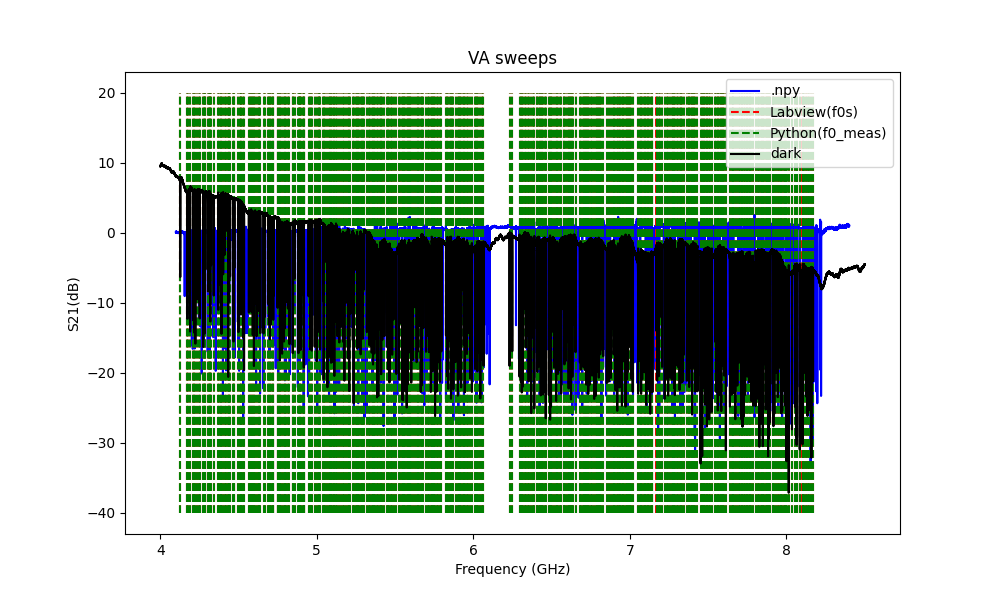

In [46]:
# de data shiften

shift = extended_master_array[:, 11] - extended_master_array[:, 9] #f0_Q - f0_meas
mean_shift = np.nanmean(shift)
print(mean_shift) 

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(freqs+mean_shift, dark, label = '.npy', color = 'blue')
ax.vlines(f0s, ymin = -40, ymax = 20, color = 'red', linestyle = '--', label = 'Labview(f0s)')
ax.vlines(f0_meas + mean_shift, ymin = -40, ymax = 20, color='green',linestyle = '--', label = 'Python(f0_meas)')
ax.plot(freqs_sweep, dark_sweep-20, label = 'dark', color = 'black')
#ax.plot(sweep[:, 0], sweep[:, 1], color = 'blue', label = 'VA sweep')
#ax.set_xlim(4.24, 4.28)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylabel('S21(dB)') #???
ax.set_title('VA sweeps')
ax.legend()



In [47]:
# nog eens hetzelfde script uitvoeren, maar dan met de shift
freqs_shifted = freqs + mean_shift
f0_meas_shifted = f0_meas + mean_shift
master_array_shifted = master_array.copy()
master_array_shifted[:, 9] = f0_meas_shifted

# -- 1. Bereid master-frequenties voor (f0_meas) --

# Zet f0_meas in float-array als dat nog niet is gedaan
f0_meas = np.array(master_array[:, 9], dtype=float)

# -- 2. Verwijder f0_meas-clusters (te dicht bij elkaar) --
min_distance = 0.0005  # GHz
sort_idx = np.argsort(f0_meas_shifted)
sorted_f0s = f0_meas_shifted[sort_idx]

# Vind te dichte buren
too_close = np.abs(np.diff(sorted_f0s)) < min_distance
invalid_idx = set()

for i, close in enumerate(too_close):
    if close:
        # Voeg beide frequenties toe (voorkant en achterkant)
        invalid_idx.add(sort_idx[i])
        invalid_idx.add(sort_idx[i + 1])

# Masker met True voor geldige f0_meas
valid_f0_mask = np.array([i not in invalid_idx for i in range(len(f0_meas_shifted))])

# -- 3. Initialiseer lege kolommen --
extra_data = {
    'KID': np.full(f0_meas_shifted.shape, '', dtype=object),
    'f0_Q': np.full(f0_meas_shifted.shape, np.nan),
    'Ql': np.full(f0_meas_shifted.shape, np.nan),
    'Qc': np.full(f0_meas_shifted.shape, np.nan),
    'Qi': np.full(f0_meas_shifted.shape, np.nan),
    'dw': np.full(f0_meas_shifted.shape, np.nan),
}
gebruikt = np.full(f0_meas_shifted.shape, False)

# -- 4. Match alleen geldige f0_meas én als f0_Q > f0_meas --
tolerance = 0.01  # GHz

for _, row in df.iterrows():
    f_q = row['f0']
    verschil = np.abs(f0_meas_shifted - f_q)

    # Vind kandidaten: nog niet gebruikt, niet te dicht, binnen tolerantie, én f0 < f_q
    kandidaten = np.where(
        (~gebruikt) &
        valid_f0_mask &
        (verschil <= tolerance) 
    )[0]

    if len(kandidaten) == 0:
        continue

    # Kies dichtstbijzijnde geldige kandidaat
    idx = kandidaten[np.argmin(verschil[kandidaten])]
    
     # Vul extra_data
    extra_data['KID'][idx] = row['KID']
    extra_data['f0_Q'][idx] = f_q
    extra_data['Ql'][idx] = row['Ql']
    extra_data['Qc'][idx] = row['Qc']
    extra_data['Qi'][idx] = row['Qi']
    extra_data['dw'][idx] = row['dw']

    gebruikt[idx] = True

# -- 5. Combineer alles --
extended_master_array = np.column_stack((
    master_array_shifted,
    extra_data['KID'],
    extra_data['f0_Q'],
    extra_data['Ql'],
    extra_data['Qc'],
    extra_data['Qi'],
    extra_data['dw']
))

colnames = ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'f0_meas','col7','col8','col9', 'KID', 'f0_Q', 'Ql', 'Qc', 'Qi','dw']
#colnames = ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'f0_meas', 'KID', 'f0_Q', 'Ql', 'Qc', 'Qi','dw']
df_extended = pd.DataFrame(extended_master_array, columns=colnames)

# Preview
#print(df_extended.head())
print(df_extended[['KID', 'col9', 'f0_Q', 'Ql', 'Qc', 'Qi','dw']]) #, 'Ql', 'Qc', 'Qi','dw'

# 1. Frequencies die te dicht op elkaar zaten
clustered_f0s = np.sort(f0_meas_shifted[list(invalid_idx)])
print("\n⚠️ f0_meas uitgesloten wegens clustering (VenA-ripples):")
print(clustered_f0s)

# 2. Frequencies die niet gekoppeld zijn (geen match gevonden)
ongekoppeld_idx = np.where((~gebruikt) & valid_f0_mask)[0]
ongekoppelde_f0s = f0_meas_shifted[ongekoppeld_idx]
print("\n❌ f0_meas niet gekoppeld (geen geldige f0_Q match):")
print(ongekoppelde_f0s)

# Optioneel: aantallen
print(f"\nTotaal aantal uitgesloten door clustering: {len(clustered_f0s)}")
print(f"Aantal niet-gematchte, geldige f0_meas: {len(ongekoppelde_f0s)}")

     KID      col9      f0_Q            Ql            Qc             Qi  \
0      1  4.127955  4.127921  38557.423091  42140.669913  453453.451455   
1      2  4.173816  4.173799  64626.518633  74472.737595  488808.321496   
2      3  4.179564  4.179542   59838.26924  67014.800633  558772.680515   
3      4  4.191061  4.191039     36117.946  39285.731551  447921.713017   
4              NaN       NaN           NaN           NaN            NaN   
..   ...       ...       ...           ...           ...            ...   
395  390  8.134202   8.13412  29028.488631  30876.891307    484910.2956   
396  391  8.145261  8.145145  28523.833335  31196.925137  332893.876896   
397  392  8.159257  8.159165  33644.622048  35142.550354  789328.714722   
398  393  8.169598  8.169498  40721.878094  45384.799708  396351.136411   
399  388  8.111709  8.111629  43643.353646  46268.423938  769240.044585   

           dw  
0    0.000003  
1   -0.000008  
2   -0.000004  
3    0.000001  
4         NaN  
.. 

C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\2876983392.py:12: RuntimeWarning: invalid value encountered in greater
  mask_Qi = (Qi_meas > 0)  & (Qi_meas < 2e6)
C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\2876983392.py:12: RuntimeWarning: invalid value encountered in less
  mask_Qi = (Qi_meas > 0)  & (Qi_meas < 2e6)
C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\2876983392.py:13: RuntimeWarning: invalid value encountered in less
  mask_Qc = Qc_meas < 1.5e5


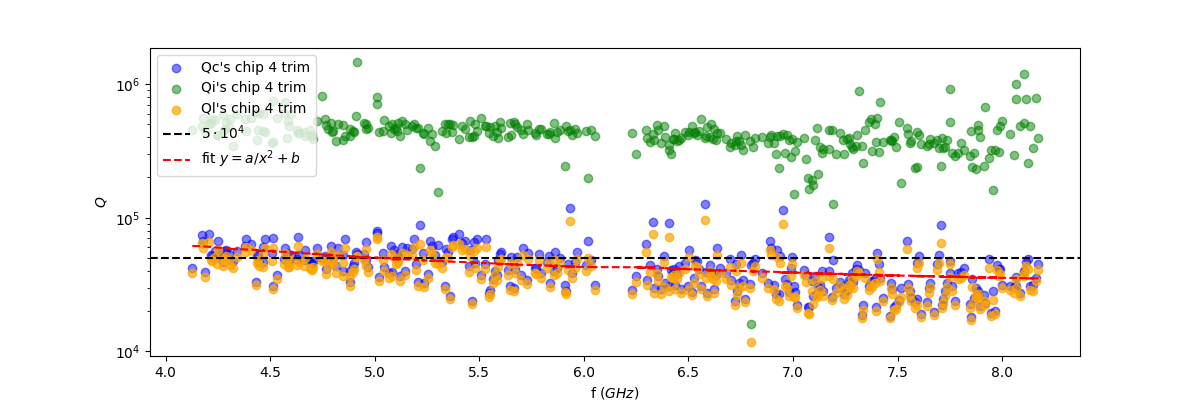

In [48]:
extended_master_array = df_extended.to_numpy()  # Convert DataFrame to NumPy array with float64 type
f0_meas = extended_master_array[:, 9]
f0_Q = extended_master_array[:,11]


Ql_meas = extended_master_array[:, 12]
Qc_meas = extended_master_array[:, 13]
Qi_meas = extended_master_array[:, 14]


# Create a mask where Qi_meas < 0
mask_Qi = (Qi_meas > 0)  & (Qi_meas < 2e6)
mask_Qc = Qc_meas < 1.5e5
mask = mask_Qi  & mask_Qc

# Replace values with np.nan where Qi_meas < 0
f0_meas = f0_meas[mask] 
Ql_meas = Ql_meas[mask]
Qc_meas = Qc_meas[mask] 
Qi_meas = Qi_meas[mask] 

def fit(x, a, b):   
    return a*x**(-2)+b 

popt, pcov = curve_fit(fit, f0_meas, Qc_meas)
f0_meas_fit = np.linspace(np.min(f0_meas), np.max(f0_meas),len(Qc_meas))

Q = popt[0]/f0_meas**2 + popt[1]


plt.figure(figsize=(12,4))
plt.yscale('log')
plt.scatter(f0_meas, Qc_meas, label = "Qc's chip 4 trim", alpha = 0.5, color = 'blue')
plt.scatter(f0_meas, Qi_meas, label = "Qi's chip 4 trim", alpha = 0.5, color = 'green')
plt.scatter(f0_meas, Ql_meas, label = "Ql's chip 4 trim", alpha = 0.7, color = 'orange' )
plt.axhline(50000, linestyle = 'dashed', color = 'black', label = '$5 \cdot 10^4$')
plt.plot(f0_meas, fit(f0_meas_fit, *popt), label='fit $y=a/x^2 +b$', c='r', ls='--')
plt.xlabel ('f ($GHz$)')
plt.ylabel ('$Q$')
plt.legend(loc='upper left')
plt.savefig("Q's chip 4 trim")
plt.show()




mean is -2039.7911566614648
std is: 34443.34200124424


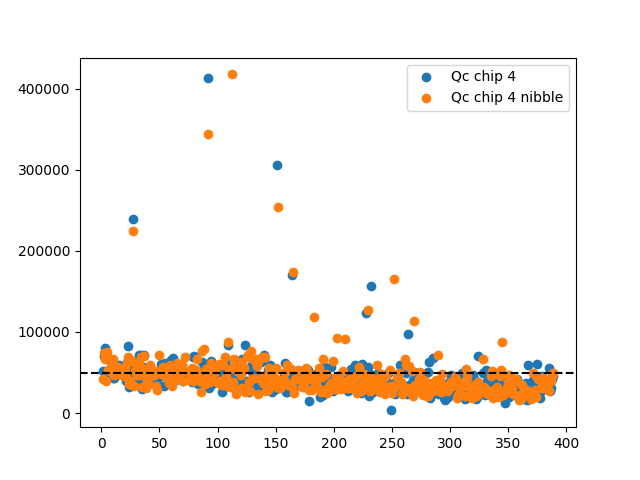

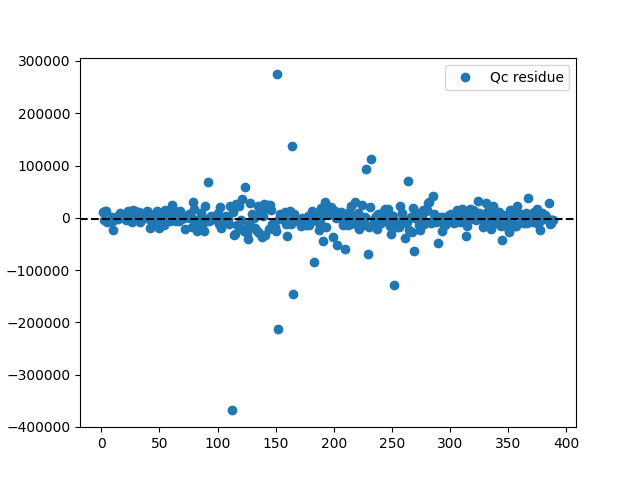

In [49]:
Qc_meas_chip4 = np.loadtxt(r'C:\Users\mpwhe\OneDrive\Documenten\BEP\BEP data\LT361chip4 trimmed\LT361chip4 trimmed\Qc_meas_chip4.csv')
Qc_meas_chip4_master = np.loadtxt(r'C:\Users\mpwhe\OneDrive\Documenten\BEP\BEP data\LT361chip4 trimmed\LT361chip4 trimmed\Qc_meas_chip4_master.csv')
extended_master_array_chip4 = np.load('master array chip4.npy', allow_pickle=True) 

#residu_master = extended_master_array[:, 13] - Qc_meas_chip4_master
residu_master = extended_master_array_chip4[:,13] - extended_master_array[:,13]

# oke dus alleen Qc's van elkaar af trekken als het KID nummer hetzelfde is

sort_index_4 = np.argsort(extended_master_array_chip4[:, 1])[::-1]
sort_index_4nibble = np.argsort(extended_master_array[:, 1])[::-1]
sorted_4 = extended_master_array_chip4[sort_index_4]
sorted_4nibble = extended_master_array[sort_index_4nibble]



# Zet arrays om naar dicts voor snelle lookup
dict_A = {row[10]: row[13] for row in extended_master_array_chip4}
dict_B = {row[10]: row[13] for row in extended_master_array}
# dict_A = {KID_chip4: Qc_meas_chip4}
# dict_B = {KID_chip4: Qc_meas_chip4nibble}
# print(dict_A)
# print(dict_B)

# Vind gedeelde IDs
gemeenschappelijke_ids = set(dict_A.keys()) & set(dict_B.keys())

# Bereken verschillen
# waarden_A = [(id_, dict_A[id_]) for id_ in gemeenschappelijke_ids]
# waarden_B = [(id_, dict_B[id_]) for id_ in gemeenschappelijke_ids]  
# print(waarden_A[1,:])
# print(waarden_B[1,:])         
verschillen = [(id_, dict_A[id_] - dict_B[id_]) for id_ in gemeenschappelijke_ids]

# Eventueel naar array
verschillen_array = np.array(verschillen)

# Zorg ervoor dat alle keys ints zijn
# Alleen geldige numerieke keys behouden
dict_A = {int(k): v for k, v in dict_A.items() if str(k).isdigit()}
dict_B = {int(k): v for k, v in dict_B.items() if str(k).isdigit()}

# Pak gewoon de gemeenschappelijke IDs zonder sorteren
common_ids = set(dict_A.keys()) & set(dict_B.keys())

# Zet per ID de kolommen naast elkaar
values_A_common = np.column_stack([dict_A[id_] for id_ in common_ids])
values_B_common = np.column_stack([dict_B[id_] for id_ in common_ids])
ids_common = np.array(list(common_ids))  # als je ze toch apart wil opslaan


# ids = verschillen_array[:, 0].astype(int) 
waardes = verschillen_array[:, 1].astype(float)

sesidue = values_A_common-values_B_common
#print(sesidue, ids_common)
print('mean is',np.nanmean(sesidue))
print('std is:',np.nanstd(sesidue))
plt.figure()
plt.scatter(ids_common,values_A_common, label= 'Qc chip 4')
plt.scatter(ids_common, values_B_common, label= 'Qc chip 4 nibble')
plt.axhline(50000, linestyle = 'dashed', color = 'black')
plt.legend()
plt.show()

plt.figure()
plt.scatter(ids_common, sesidue, label = 'Qc residue')
plt.axhline(np.nanmean(sesidue), linestyle = 'dashed', color = 'black')
plt.legend()
plt.show()

137.92638064090585
30851.3640424478


C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\1164484102.py:9: RuntimeWarning: invalid value encountered in greater
  mask_Qi_chip4 = (Qi_meas_chip4 > 0) & (Qi_meas_chip4 < 2e6)   #misschien werkt dit niet
C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\1164484102.py:9: RuntimeWarning: invalid value encountered in less
  mask_Qi_chip4 = (Qi_meas_chip4 > 0) & (Qi_meas_chip4 < 2e6)   #misschien werkt dit niet
C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\1164484102.py:10: RuntimeWarning: invalid value encountered in greater
  mask_Qi_chip4nibble = (Qi_meas_chip4nibble > 0)  & (Qi_meas_chip4nibble < 2e6)
C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\1164484102.py:10: RuntimeWarning: invalid value encountered in less
  mask_Qi_chip4nibble = (Qi_meas_chip4nibble > 0)  & (Qi_meas_chip4nibble < 2e6)
C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\1164484102.py:11: RuntimeWarning: invalid value encountered in less
  mask_Qc_chip4 = Qc_meas_chip4 < 1.5e5
C:\Users\mpwhe\AppData\L

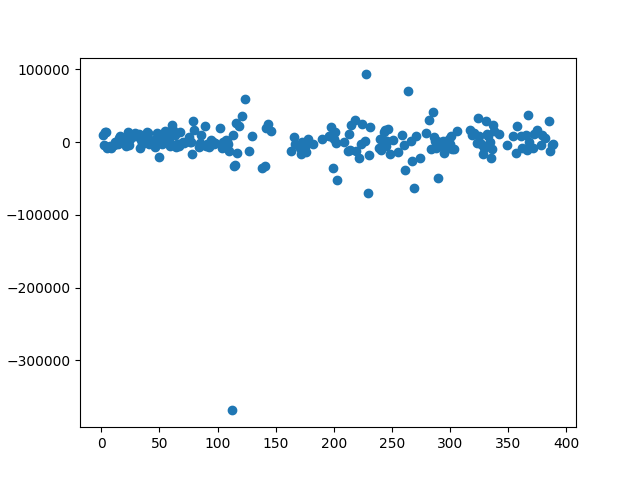

In [50]:
KID_chip4 = extended_master_array_chip4[:,10]
KID_chip4nibble = extended_master_array[:,10]
Qc_meas_chip4 = extended_master_array_chip4[:,13]
Qc_meas_chip4nibble = extended_master_array[:,13]
Qi_meas_chip4 = extended_master_array_chip4[:,14]
Qi_meas_chip4nibble = extended_master_array[:,14]

# Create a mask where Qi_meas < 0
mask_Qi_chip4 = (Qi_meas_chip4 > 0) & (Qi_meas_chip4 < 2e6)   #misschien werkt dit niet
mask_Qi_chip4nibble = (Qi_meas_chip4nibble > 0)  & (Qi_meas_chip4nibble < 2e6)
mask_Qc_chip4 = Qc_meas_chip4 < 1.5e5
mask_Qc_chip4nibble = Qc_meas_chip4nibble < 1.5e5
mask_residue = mask_Qi_chip4  & mask_Qc_chip4 & mask_Qi_chip4  & mask_Qc_chip4

# Replace values with np.nan where Qi_meas < 0
KID_chip4 = KID_chip4[mask_residue]
KID_chip4nibble = KID_chip4nibble[mask_residue]
Qc_meas_chip4 = Qc_meas_chip4[mask_residue] 
Qc_meas_chip4nibble = Qc_meas_chip4nibble[mask_residue] 
Qi_meas_chip4 = Qi_meas_chip4[mask_residue] 
Qi_meas_chip4nibble = Qi_meas_chip4nibble[mask_residue] 

verschillen_Qc = []
verschillen_Qi = []
ids_voor_verschil = []

for i in range(len(KID_chip4)):
    for j in range(len(KID_chip4nibble)):
        if KID_chip4[i] == KID_chip4nibble[j]:
            verschil_Qc = Qc_meas_chip4[i] - Qc_meas_chip4nibble[j]
            verschillen_Qc.append(verschil_Qc)
            verschil_Qi = Qi_meas_chip4[i] - Qi_meas_chip4nibble[j]
            verschillen_Qi.append(verschil_Qi)
            ids_voor_verschil.append(KID_chip4[i])
verschillen_Qc = np.array([verschillen_Qc])
# verschillen_Qc = verschillen_Qc[verschillen_Qc > -2e5 ]

print(np.mean(verschillen_Qc))
print(np.std(verschillen_Qc))
plt.figure()
plt.scatter(ids_voor_verschil, verschillen_Qc)
plt.show()

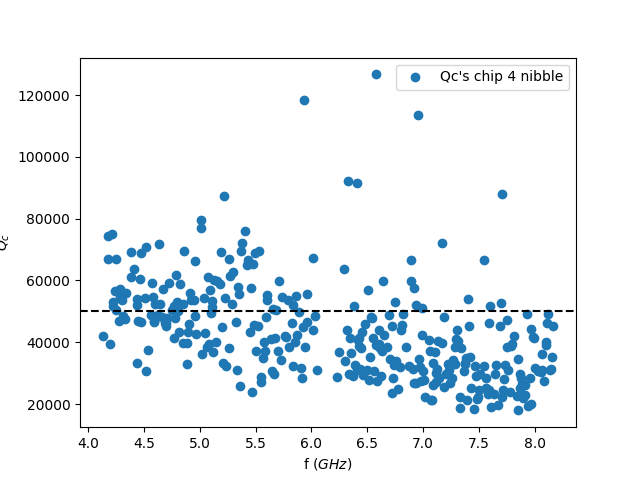

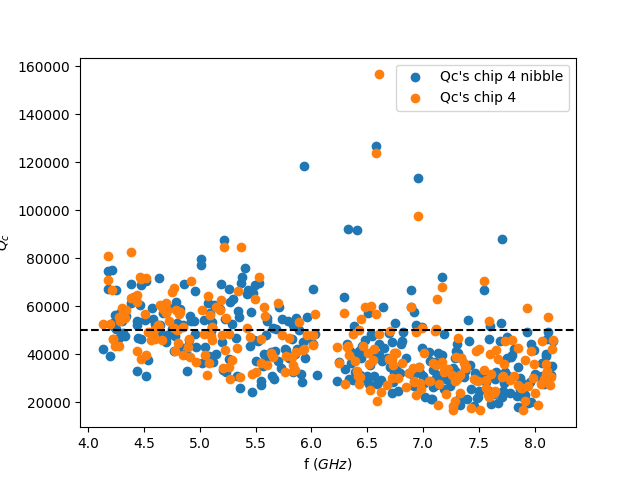

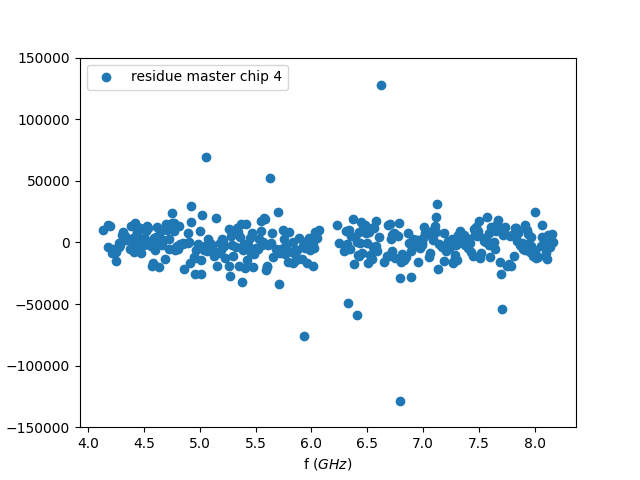

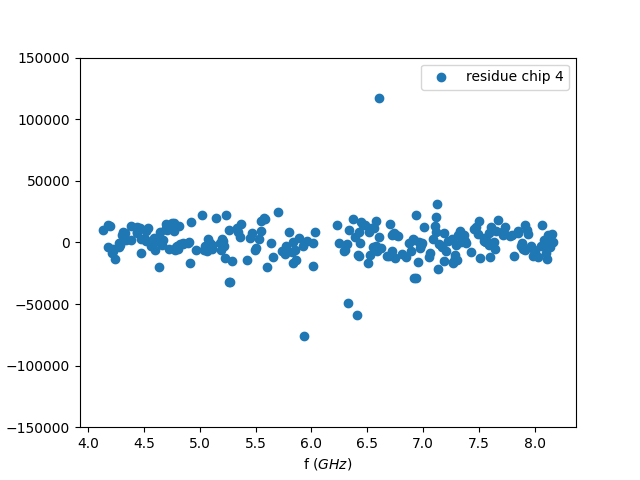

451.6448562363739
14584.538965788071
-1945.018762988398
24675.858616162408


C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\3370280916.py:52: RuntimeWarning: invalid value encountered in less
  mask_residue = (residue < 1.5e5) & (residue > -1.5e5)
C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\3370280916.py:52: RuntimeWarning: invalid value encountered in greater
  mask_residue = (residue < 1.5e5) & (residue > -1.5e5)


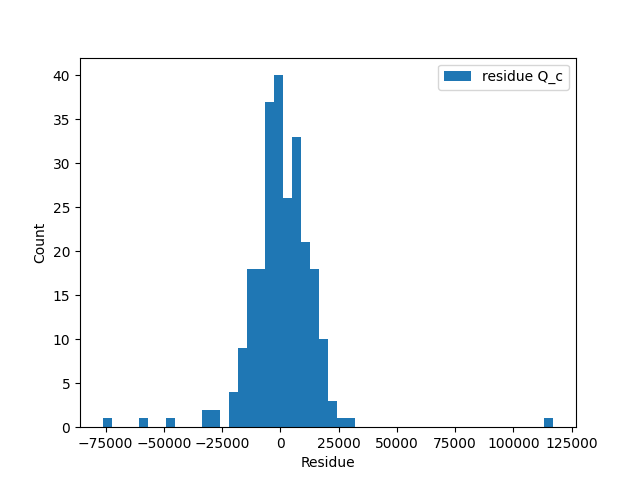

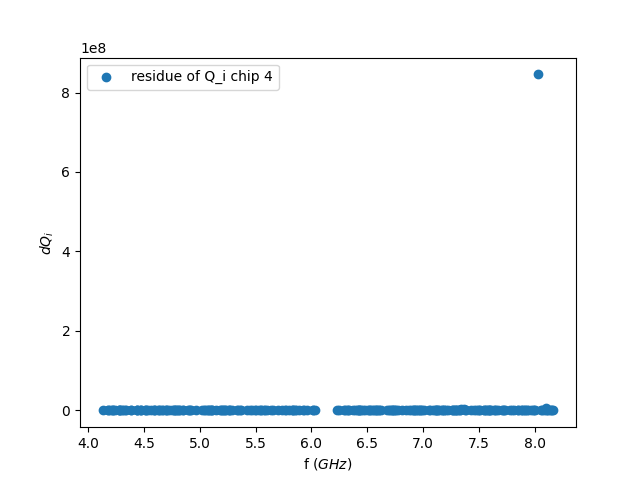

146835.30831169707
290368.3277004296


C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\3370280916.py:81: RuntimeWarning: invalid value encountered in less
  mask_residue_Qi = (residue_Qi < 5e6) & (residue_Qi > -5e6)
C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\3370280916.py:81: RuntimeWarning: invalid value encountered in greater
  mask_residue_Qi = (residue_Qi < 5e6) & (residue_Qi > -5e6)


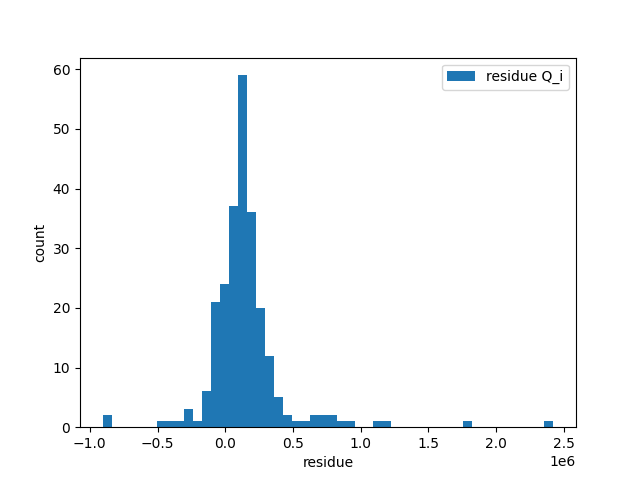

247 245


ValueError: x and y must be the same size

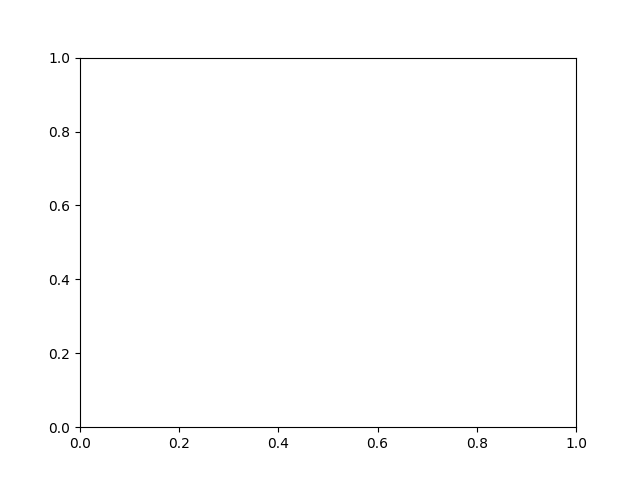

In [51]:

Qi_meas_chip4_master = np.loadtxt(r'C:\Users\mpwhe\OneDrive\Documenten\BEP\BEP data\LT361chip4 trimmed\LT361chip4 trimmed\Qi_meas_chip4_master.csv')
mask_chip4 = Qc_meas_chip4_master < 1.5e5
mask_chip4_Qi = (Qi_meas_chip4_master > 0)  & (Qi_meas_chip4_master < 2e6)
Qc_meas_chip4_master = Qc_meas_chip4_master[mask]
Qi_meas_chip4_master = Qi_meas_chip4_master[mask]
residue = Qc_meas_chip4_master - Qc_meas
residue_Qi = Qi_meas_chip4_master - Qi_meas
#residue = Qc_meas -Qc_meas_chip4_master 

kid_id_board = np.ones((20, 20), dtype=int)
kid_id_board[master_array[:,1].astype(int), master_array[:,2].astype(int)] = master_array[:,0]

plt.figure()
plt.scatter(f0_meas, Qc_meas, label = "Qc's chip 4 nibble")
plt.axhline(50000, linestyle = 'dashed', color = 'black')
plt.xlabel ('f ($GHz$)')
plt.ylabel ('$Q_c$')
plt.legend()
plt.savefig("Qc's chip 4 nibble")
plt.show()

plt.figure()
plt.scatter(f0_meas, Qc_meas, label = "Qc's chip 4 nibble")
plt.scatter(f0_meas, Qc_meas_chip4_master, label = "Qc's chip 4")
plt.axhline(50000, linestyle = 'dashed', color = 'black')
plt.xlabel ('f ($GHz$)')
plt.ylabel ('$Q_c$')
plt.legend()
plt.savefig("Qc's chip 4 nibble")
plt.show()

plt.figure()
plt.scatter(extended_master_array[:,9], residu_master, label = "residue master chip 4")
#plt.axhline(50000, linestyle = 'dashed', color = 'black')
plt.xlabel ('f ($GHz$)')
plt.ylabel ('$dQ_c$')
plt.ylim(-150000,150000)
plt.legend()
plt.savefig("residue chip 4")
plt.show()

plt.figure()
plt.scatter(f0_meas, residue, label = "residue chip 4")
#plt.axhline(50000, linestyle = 'dashed', color = 'black')
plt.xlabel ('f ($GHz$)')
plt.ylabel ('$dQ_c$')
plt.ylim(-150000,150000)
plt.legend()
plt.savefig("residue chip 4")
plt.show()

mask_residue = (residue < 1.5e5) & (residue > -1.5e5)
residue = residue[mask_residue]

print(np.nanmean(residue))
print(np.nanstd(residue))
print(np.nanmean(residu_master))
print(np.nanstd(residu_master))

plt.figure()
plt.hist(residue, bins=50, label='residue Q_c')
#plt.plot(x_frac, p_frac, 'r-', linewidth=2, label='Fitted Normal')
plt.xlabel('Residue') 
plt.ylabel('Count')
# plt.xlim(-2,4)
plt.legend()
plt.savefig('histogram of residue_Qc')
plt.show()


plt.figure()
plt.scatter(f0_meas, residue_Qi, label = "residue of Q_i chip 4")
#plt.axhline(50000, linestyle = 'dashed', color = 'black')
plt.xlabel ('f ($GHz$)')
plt.ylabel ('$dQ_i$')
# plt.ylim(-150000,150000)
plt.legend()
plt.savefig("residue Qi chip 4")
plt.show()

mask_residue_Qi = (residue_Qi < 5e6) & (residue_Qi > -5e6)
residue_Qi = residue_Qi[mask_residue_Qi]

print(np.nanmean(residue_Qi))
print(np.nanstd(residue_Qi))

plt.figure()
plt.hist(residue_Qi, bins=50, label='residue Q_i')
#plt.plot(x_frac, p_frac, 'r-', linewidth=2, label='Fitted Normal')
plt.xlabel('residue') 
plt.ylabel('count')
# plt.xlim(-2,4)
plt.legend()
plt.savefig('histogram of residue_Qi')
plt.show()

print(len(residue), len(residue_Qi))
plt.figure()
plt.scatter(residue, residue_Qi)
plt.show()



(400,)
[ 52419.10897954  70953.26013647  80749.55470118  52457.63169573
             nan  66559.6369316   46442.06639503  46216.90010246
  43188.55744943             nan             nan  43172.69832039
  55629.3215455   54995.2743502   59405.64129822  57154.02939603
  53186.4247585   53597.75682919  58213.98807393  52663.13972962
  55216.99632321  39473.06995921  63567.82483815  82560.9983606
  32195.32913528  43119.16539871             nan 239589.7864429
  41268.28110433  61811.86382928             nan  38033.00485869
  72151.15183968  71382.55511753  64818.88774629  29159.53294545
  71863.20903705  53292.93164734  49163.63757949  56800.88896328
  39631.35329406  46056.08210779             nan             nan
  47137.91319293  46125.60423223  38038.021312    40646.91782242
  52239.32600404  51707.17355449  60551.97605911  50038.03300465
  45663.29715589  58920.25176971             nan             nan
  58249.78791016  40303.67785704  53597.20641293  61397.8041329
  57076.33002386  579

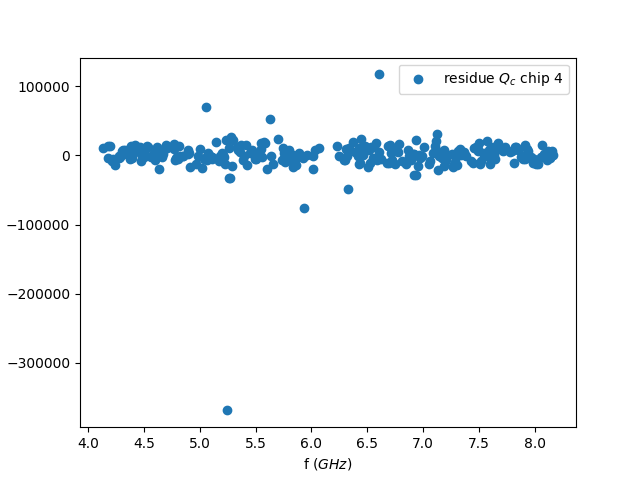

c:\Users\mpwhe\OneDrive\Documenten\BEP\BEP data\.venv\lib\site-packages\numpy\lib\_histograms_impl.py:835: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\mpwhe\OneDrive\Documenten\BEP\BEP data\.venv\lib\site-packages\numpy\lib\_histograms_impl.py:836: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


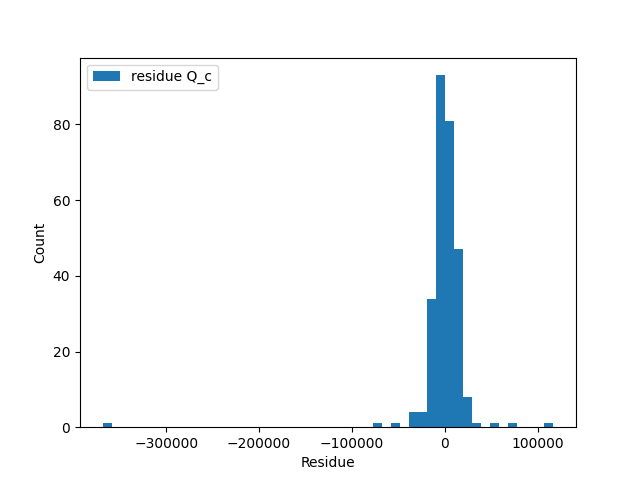

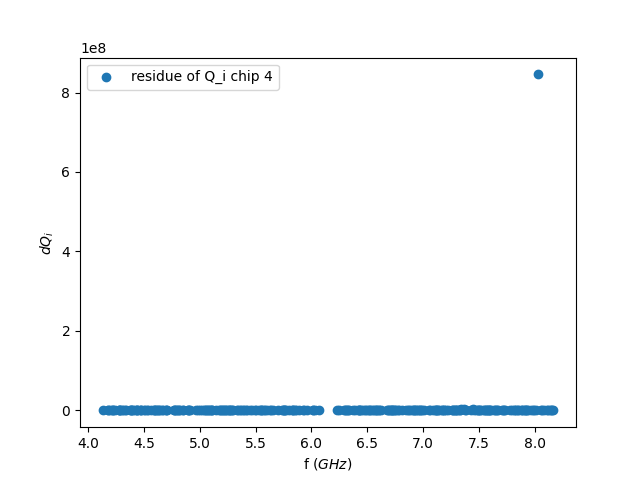

249622.01811238113
414167.9691001835


C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\619297772.py:51: RuntimeWarning: invalid value encountered in less
  mask_residue_Qi = (residue_Qi < 5e6) & (residue_Qi > -5e6)
C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\619297772.py:51: RuntimeWarning: invalid value encountered in greater
  mask_residue_Qi = (residue_Qi < 5e6) & (residue_Qi > -5e6)


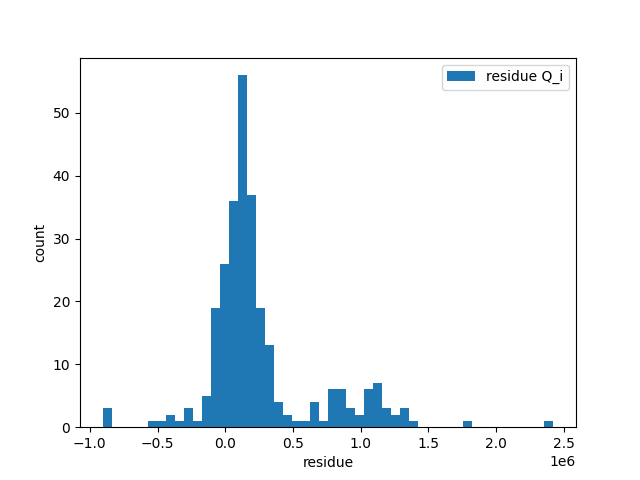

In [ ]:
f0_meas = extended_master_array[:, 9]
Ql_meas = extended_master_array[:, 12]
Qc_meas = extended_master_array[:, 13]
Qi_meas = extended_master_array[:, 14]

Qc_meas_chip4_master = np.loadtxt(r'C:\Users\mpwhe\OneDrive\Documenten\BEP\BEP data\LT361chip4 trimmed\LT361chip4 trimmed\Qc_meas_chip4_master.csv')
print(Qc_meas_chip4_master.shape)
residu_master = extended_master_array[:, 13] - Qc_meas_chip4_master
Qi_meas_chip4_master = np.loadtxt(r'C:\Users\mpwhe\OneDrive\Documenten\BEP\BEP data\LT361chip4 trimmed\LT361chip4 trimmed\Qi_meas_chip4_master.csv')
print(Qc_meas_chip4_master)
print(Qc_meas)
residue = Qc_meas_chip4_master - Qc_meas
residue_Qi = Qi_meas_chip4_master - Qi_meas

print(np.nanmean(residue))
print(np.nanstd(residue))
print(np.nanmean(residu_master))
print(np.nanstd(residu_master))

plt.figure()
plt.scatter(f0_meas, residue, label = "residue $Q_c$ chip 4")
#plt.axhline(50000, linestyle = 'dashed', color = 'black')
plt.xlabel ('f ($GHz$)')
plt.ylabel ('$dQ_c$')
#plt.ylim(-150000,150000)
plt.legend()
plt.savefig("residue chip 4")
plt.show()

plt.figure()
plt.hist(residue, bins=50, label='residue Q_c')
#plt.plot(x_frac, p_frac, 'r-', linewidth=2, label='Fitted Normal')
plt.xlabel('Residue') 
plt.ylabel('Count')
# plt.xlim(-2,4)
plt.legend()
plt.savefig('histogram of residue_Qc')
plt.show()


plt.figure()
plt.scatter(f0_meas, residue_Qi, label = "residue of Q_i chip 4")
#plt.axhline(50000, linestyle = 'dashed', color = 'black')
plt.xlabel ('f ($GHz$)')
plt.ylabel ('$dQ_i$')
# plt.ylim(-150000,150000)
plt.legend()
plt.savefig("residue Qi chip 4")
plt.show()

mask_residue_Qi = (residue_Qi < 5e6) & (residue_Qi > -5e6)
residue_Qi = residue_Qi[mask_residue_Qi]

print(np.nanmean(residue_Qi))
print(np.nanstd(residue_Qi))

plt.figure()
plt.hist(residue_Qi, bins=50, label='residue Q_i')
#plt.plot(x_frac, p_frac, 'r-', linewidth=2, label='Fitted Normal')
plt.xlabel('residue') 
plt.ylabel('count')
# plt.xlim(-2,4)
plt.legend()
plt.savefig('histogram of residue_Qi')
plt.show()



93
952267.0409594676 17921.869181203307
150


C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\654837229.py:50: RuntimeWarning: invalid value encountered in less
  too_close = df0_meas < min_df


ValueError: array must not contain infs or NaNs

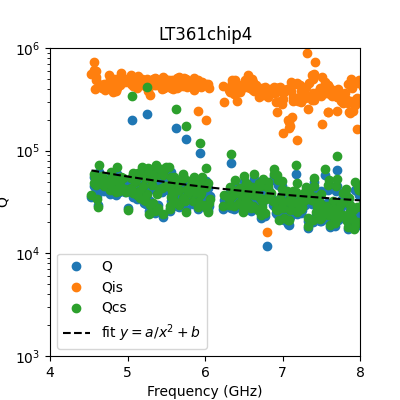

In [ ]:
def fit(x, a, b):   
    return a*x**(-2)+b 

f0s = np.array(df['f0'])
Qs = np.array(df['Ql'])
Qis = np.array(df['Qi'])
Qcs = np.array(df['Qc'])


# # mask only for this cell to get rid of Nan values
# f0_meas = f0_meas.astype(float)
# Ql_meas = Ql_meas.astype(float)
# Qc_meas = Qc_meas.astype(float)
# Qi_meas = Qi_meas.astype(float)
# # Create a mask where all values are not NaN
# mask_valid = ~np.isnan(f0_meas) & ~np.isnan(Ql_meas) & ~np.isnan(Qc_meas) & ~np.isnan(Qi_meas)
# # Apply the mask to each array
# f0_meas = f0_meas[mask_valid]
# Ql_meas = Ql_meas[mask_valid]
# Qc_meas = Qc_meas[mask_valid]
# Qi_meas = Qi_meas[mask_valid]


min_df = 0.002
df0s = f0s[1:] - f0s[:-1]
df_mask = np.zeros(f0s.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))
print(np.sum(too_close_mask))
popt, pcov = curve_fit(fit, f0s[~too_close_mask], Qcs[~too_close_mask])
f0s_fit = np.linspace(f0s[~too_close_mask].min(), f0s[~too_close_mask].max(), 100)

fig, ax = plt.subplots(figsize=(4,4))
ax.set_title('LT361chip4')
ax.set_yscale('log')
ax.scatter(f0s[~too_close_mask], Qs[~too_close_mask], label='Q')
ax.scatter(f0s[~too_close_mask], Qis[~too_close_mask], label='Qis')
ax.scatter(f0s[~too_close_mask], Qcs[~too_close_mask], label='Qcs')
ax.plot(f0s_fit, fit(f0s_fit, *popt), label='fit $y=a/x^2 +b$', c='k', ls='--')
ax.set_xlim(4,8)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(1e3, 1e6)
ax.set_ylabel('Q')
ax.legend()
print(*popt)

min_df = 0.002
df0_meas = f0_meas[1:] - f0_meas[:-1]
df__meas_mask = np.zeros(f0_meas.shape, dtype=bool)
too_close = df0_meas < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))
print(np.sum(too_close_mask))
popt, pcov = curve_fit(fit, f0_meas[~too_close_mask], Qc_meas[~too_close_mask])
f0_meas_fit = np.linspace(f0_meas[~too_close_mask].min(), f0_meas[~too_close_mask].max(), 100)

fig, ax = plt.subplots(figsize=(4,4))
ax.set_title('LT361chip4')
ax.set_yscale('log')
ax.scatter(f0_meas[~too_close_mask], Ql_meas[~too_close_mask], label='Ql_meas')
ax.scatter(f0_meas[~too_close_mask], Qi_meas[~too_close_mask], label='Qi_meas')
ax.scatter(f0_meas[~too_close_mask], Qc_meas[~too_close_mask], label='Qc_meas')
ax.plot(f0_meas_fit, fit(f0_meas_fit, *popt), label='fit $y=a/x^2 +b$', c='k', ls='--')
ax.set_xlim(4,8)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(1e3, 1e6)
ax.set_ylabel('Q')
ax.grid()
ax.legend()
print(*popt)




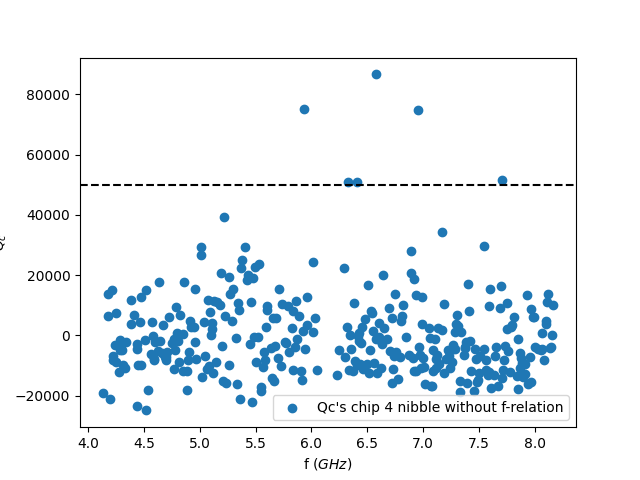

Mean fractional Qc: -0.0011793840939901773, Std fractional Qc: 0.3438856173987009
Mean fractional Ql: -0.10785648395618037, Std fractional Ql: 0.267824855123071
Mean Qc_meas: 43682.97710030752
Std Qc_meas: 16024.867271491044


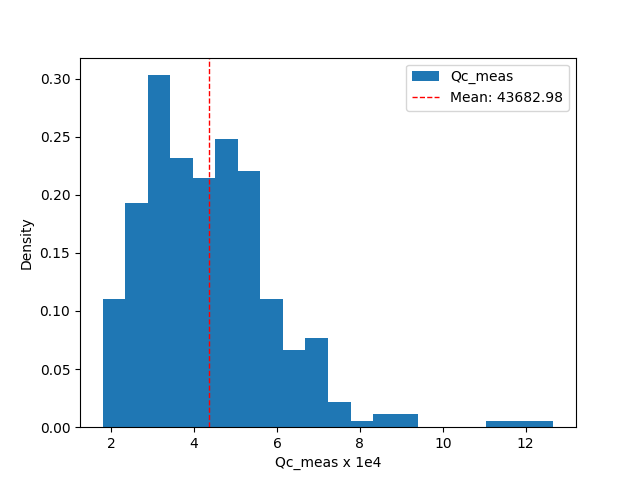

In [52]:

# f0_meas = extended_master_array[:, 6]
# Ql_meas = extended_master_array[:, 12]
# Qc_meas = extended_master_array[:, 13]
# Qi_meas = extended_master_array[:, 14]


# # Create a mask where Qi_meas < 0
# mask_Qi = (Qi_meas > 0)  & (Qi_meas < 1e6)
# mask_Qc = Qc_meas < 1e5
# mask = mask_Qi  & mask_Qc

# # Replace values with np.nan where Qi_meas < 0
# f0_meas = f0_meas[mask] 
# Ql_meas = Ql_meas[mask]
# Qc_meas = Qc_meas[mask] 
# Qi_meas = Qi_meas[mask] 

Q = popt[0]/f0_meas**2 + popt[1]  #f0_meas or f0_meas_shifted?

Ql_spatiel = Ql_meas - Q
Qc_spatiel = Qc_meas - Q

plt.figure()
plt.scatter(f0_meas, Qc_spatiel, label = "Qc's chip 4 nibble without f-relation")
plt.axhline(50000, linestyle = 'dashed', color = 'black')
plt.xlabel ('f ($GHz$)')
plt.ylabel ('$Q_c$')
plt.legend()
plt.savefig("Qc's chip 4 nibble without f-relation")
plt.show()

Q_designed = Q
frac_Ql = (Ql_meas-Q_designed)/Q_designed
mean_frac_Ql = np.nanmean(frac_Ql)
std_frac_Ql = np.nanstd(frac_Ql)

frac_Qc = (Qc_meas-Q_designed)/Q_designed
mean_frac_Qc = np.nanmean(frac_Qc)
std_frac_Qc = np.nanstd(frac_Qc)




# Qc_meas_hist = Qc_meas[Qc_meas < 220000]  # filter outliers


print(f"Mean fractional Qc: {mean_frac_Qc}, Std fractional Qc: {np.nanstd(frac_Qc)}")
print(f"Mean fractional Ql: {mean_frac_Ql}, Std fractional Ql: {std_frac_Ql}")

mean_Qc_meas = np.nanmean(Qc_meas)
print(f"Mean Qc_meas: {mean_Qc_meas}")
std_Qc_meas = np.nanstd(Qc_meas)
print(f"Std Qc_meas: {std_Qc_meas}")

plt.figure()
plt.hist(Qc_meas/1e4, bins=20, density=True, label='Qc_meas')
plt.xlabel('Qc_meas x 1e4')
plt.ylabel('Density')
plt.axvline(np.nanmean(Qc_meas)/1e4, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.nanmean(Qc_meas):.2f}')
plt.legend()
plt.show()



Fitted mu_Qc: 43682.97710030752, std_Qc: 16024.867271491039
Fitted mu_frac_Qc: -0.0011793840939901981, std_frac_Qc: 0.3438856173987008
Fitted mu_Ql: -0.10785648395618036, std_Ql: 0.26782485512307086


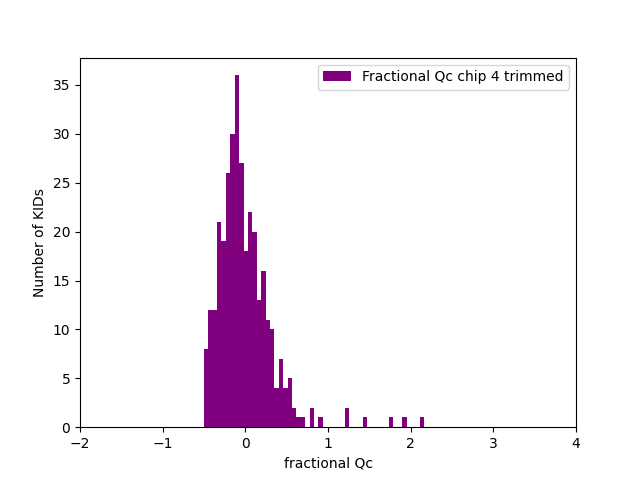

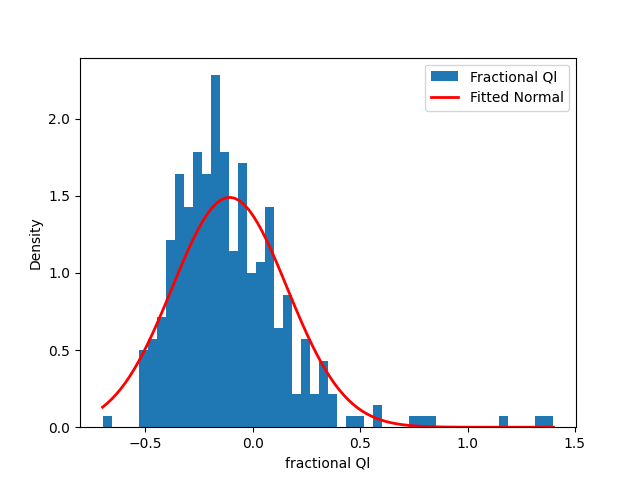

In [53]:
frac_Qc = np.array(frac_Qc, dtype=float) 
frac_Qc = frac_Qc[np.isfinite(frac_Qc)]  # filter out NaN values
frac_Ql = np.array(frac_Ql, dtype=float) 
frac_Ql = frac_Ql[np.isfinite(frac_Ql)]  # filter out NaN values
Qc_meas = np.array(Qc_meas, dtype=float)
Qc_meas = Qc_meas[np.isfinite(Qc_meas)]  # filter out NaN values
#Qc_meas = Qc_meas[Qc_meas < 250000]  # filter outliers

mu_Qc, std_Qc = norm.fit(Qc_meas)
mu_frac_Qc, std_frac_Qc = norm.fit(frac_Qc)
mu_frac_Ql, std_frac_Ql = norm.fit(frac_Ql)
print(f"Fitted mu_Qc: {mu_Qc}, std_Qc: {std_Qc}")
print(f"Fitted mu_frac_Qc: {mu_frac_Qc}, std_frac_Qc: {std_frac_Qc}")
print(f"Fitted mu_Ql: {mu_frac_Ql}, std_Ql: {std_frac_Ql}")



# Plot the PDF of the fitted normal distribution

#x = np.linspace(0,20, 100)
x = np.linspace(min(Qc_meas/1e4), max(Qc_meas/2e4), 100)
x_frac = np.linspace (min(frac_Qc), max(frac_Qc), 100)  # for fractional Ql and Qc
x_frac_Ql = np.linspace(min(frac_Ql), max(frac_Ql), 100)  # for fractional Ql
# = norm.pdf(x, mu_Qc, std_Qc)
p = norm.pdf(x, mu_Qc/1e4, std_Qc/1e4)
p_frac = norm.pdf(x_frac, mu_frac_Qc, std_frac_Qc)
p_frac_Ql = norm.pdf(x_frac_Ql, mu_frac_Ql, std_frac_Ql)

plt.figure()
plt.hist(frac_Qc, bins=50, label='Fractional Qc chip 4 trimmed', color = 'purple')
#plt.plot(x_frac, p_frac, 'r-', linewidth=2, label='Fitted Normal')
plt.xlabel('fractional Qc') 
plt.ylabel('Number of KIDs')
plt.xlim(-2,4)
plt.legend()
plt.savefig('histogram frac Qc chip 4 nibble')
plt.show()

plt.figure()
plt.hist(frac_Ql, bins=50, density=True, label='Fractional Ql')
plt.plot(x_frac_Ql, p_frac_Ql, 'r-', linewidth=2, label='Fitted Normal')
plt.xlabel('fractional Ql')
plt.ylabel('Density')
plt.legend()
plt.show()


In [54]:

# # Qi_meas = extended_master_array[:, 14]
# # Qc_meas = extended_master_array[:, 13]


# Qc_meas = Qc_meas.astype(float)
# Qi_meas = Qi_meas.astype(float)
# # Qc_meas[Qc_meas > 150000] = np.nan
# # Qi_meas[Qi_meas > 2000000]=np.nan
# # Qi_meas[Qi_meas < 0]=np.nan

# mask = ~np.isnan(Qc_meas) & ~np.isnan(Qi_meas)
# Qc_meas, Qi_meas = Qc_meas[mask], Qi_meas[mask]
# print(np.max(Qc_meas))




# correlation_matrix = np.corrcoef(Qc_meas, Qi_meas)
# correlation_Q = np.correlate(Qc_meas, Qi_meas)
# print(correlation_Q)

# # Extract the correlation coefficient
# correlation = correlation_matrix[0, 1]
# print(correlation)

# plt.figure()
# plt.scatter(Qc_meas, Qi_meas)
# plt.xlabel('Qc')
# plt.ylabel('Qi')
# # plt.xlim(0,80000)
# # plt.ylim(0,800000)
# plt.show()



C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\1738179210.py:9: RuntimeWarning: invalid value encountered in greater
  mask_Qi = (Qi_meas > 0)  & (Qi_meas < 2e6)
C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\1738179210.py:9: RuntimeWarning: invalid value encountered in less
  mask_Qi = (Qi_meas > 0)  & (Qi_meas < 2e6)
C:\Users\mpwhe\AppData\Local\Temp\ipykernel_15744\1738179210.py:10: RuntimeWarning: invalid value encountered in less
  mask_Qc = Qc_meas < 1.5e5



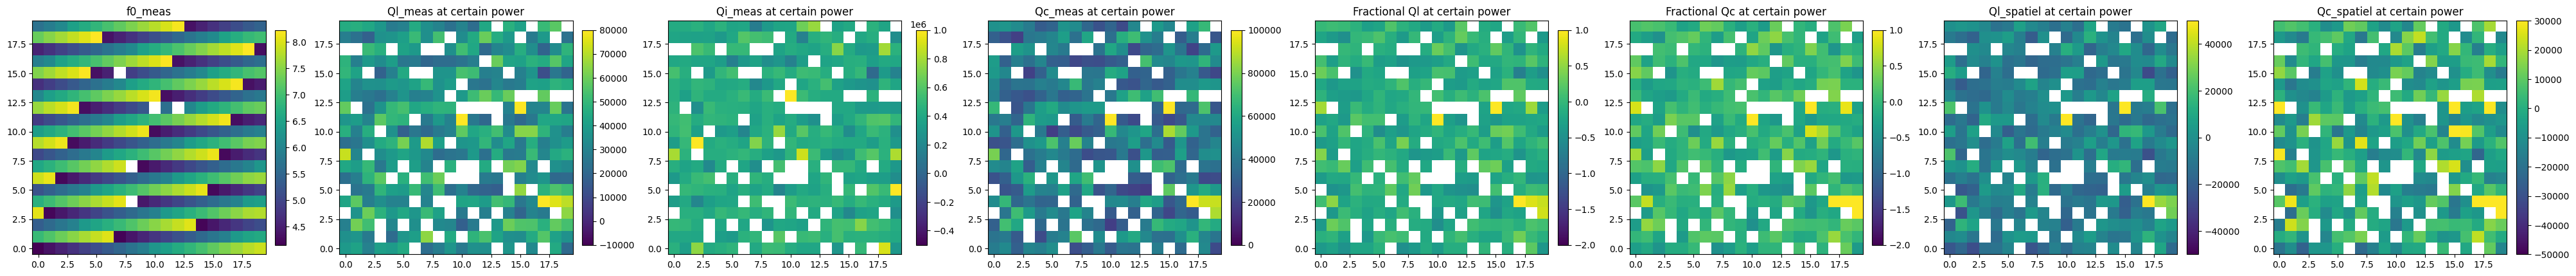

In [55]:
# Create the multi-panel figure
f0_meas = extended_master_array[:, 6]
Ql_meas = extended_master_array[:, 12]
Qc_meas = extended_master_array[:, 13]
Qi_meas = extended_master_array[:, 14]


# Create a mask where Qi_meas < 0
mask_Qi = (Qi_meas > 0)  & (Qi_meas < 2e6)
mask_Qc = Qc_meas < 1.5e5
mask = mask_Qi  & mask_Qc

# Replace values with np.nan where Qi_meas < 0
f0_meas = f0_meas[mask] 
Ql_meas = Ql_meas[mask]
Qc_meas = Qc_meas[mask] 
Qi_meas = Qi_meas[mask]


Ql_spatiel = Ql_meas - Q
Qc_spatiel = Qc_meas - Q

Q_designed = Q
frac_Ql = (Ql_meas-Q_designed)/Q_designed
frac_Qc = (Qc_meas-Q_designed)/Q_designed



def reconstruct_array_with_nan(mask, filtered_array):
    full_array = np.full(mask.shape, np.nan)  # Maak array gevuld met nan
    full_array[mask] = filtered_array
    return full_array

# Aanname: valid_mask is van lengte 400
Qc_meas = reconstruct_array_with_nan(mask, Qc_meas)
Ql_meas = reconstruct_array_with_nan(mask, Ql_meas)
Qi_meas = reconstruct_array_with_nan(mask, Qi_meas)
frac_Qc = reconstruct_array_with_nan(mask, frac_Qc)
frac_Ql = reconstruct_array_with_nan(mask, frac_Ql)
Ql_spatiel = reconstruct_array_with_nan(mask, Ql_spatiel)
Qc_spatiel = reconstruct_array_with_nan(mask, Qc_spatiel)


fig, axes = plt.subplots(1, 8, figsize=(40, 15), constrained_layout=True)

im0 = axes[0].imshow(extended_master_array[:,6].astype(float)[kid_id_board], cmap='viridis', origin='lower')
axes[0].set_title('f0_meas')
fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

im1 = axes[1].imshow(Ql_meas.astype(float)[kid_id_board], cmap='viridis', origin='lower', vmin=-10000, vmax=80000)
axes[1].set_title('Ql_meas at certain power')
fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

im2 = axes[2].imshow(Qi_meas.astype(float)[kid_id_board], cmap='viridis', origin='lower', vmin=-500000, vmax=1000000)
axes[2].set_title('Qi_meas at certain power')
fig.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)

im3 = axes[3].imshow(Qc_meas.astype(float)[kid_id_board], cmap='viridis', origin='lower', vmin=0, vmax=100000)
axes[3].set_title('Qc_meas at certain power')
fig.colorbar(im3, ax=axes[3], fraction=0.046, pad=0.04)

im4 = axes[4].imshow(frac_Ql.astype(float)[kid_id_board], cmap='viridis', origin='lower', vmin=-2, vmax=1)
axes[4].set_title('Fractional Ql at certain power')
fig.colorbar(im4, ax=axes[4], fraction=0.046, pad=0.04)

im5 = axes[5].imshow(frac_Qc.astype(float)[kid_id_board], cmap='viridis', origin='lower', vmin=-2, vmax=1)
axes[5].set_title('Fractional Qc at certain power')
fig.colorbar(im5, ax=axes[5], fraction=0.046, pad=0.04)

im6 = axes[6].imshow(Ql_spatiel.astype(float)[kid_id_board], cmap='viridis', origin='lower', vmin=-50000, vmax=50000)
axes[6].set_title('Ql_spatiel at certain power')
fig.colorbar(im6, ax=axes[6], orientation='vertical', fraction=0.05, pad=0.04)

im7 = axes[7].imshow(Qc_spatiel.astype(float)[kid_id_board], cmap='viridis', origin='lower', vmin=-50000, vmax=30000)
axes[7].set_title('Qc_spatiel at certain power')
fig.colorbar(im7, ax=axes[7], orientation='vertical', fraction=0.05, pad=0.04)



#plt.tight_layout()

# Save the figure to a buffer
buf = io.BytesIO()
fig.savefig(buf, format='png', bbox_inches='tight')
buf.seek(0)
encoded = base64.b64encode(buf.read()).decode('utf-8')

# Create a scrollable HTML container for the image
html = f'''
<div style="overflow-x: auto; white-space: nowrap; width:3000px; height:1500px border:1px solid #ccc; padding:10px;">
    <img src="data:image/png;base64,{encoded}" style="display: inline-block;" />
</div>
'''

display(HTML(html))
plt.close(fig)  


In [56]:
# Nieuwe figuur en as aanmaken
fig_single, ax_single = plt.subplots(figsize=(5, 5))  # pas grootte aan indien nodig

# Hetzelfde plot opnieuw tekenen
im = ax_single.imshow(frac_Qc.astype(float)[kid_id_board], cmap='viridis', origin='lower', vmin=-1, vmax=1)
#ax_single.set_title('Fractional Qc at certain power')

# Colorbar toevoegen
fig_single.colorbar(im, ax=ax_single, fraction=0.046, pad=0.04)

# Opslaan
fig_single.savefig('Heatmap_frac_Qc_chip4nibble_only.png', bbox_inches='tight', dpi=300)
plt.close(fig_single)

0.04910404776224681


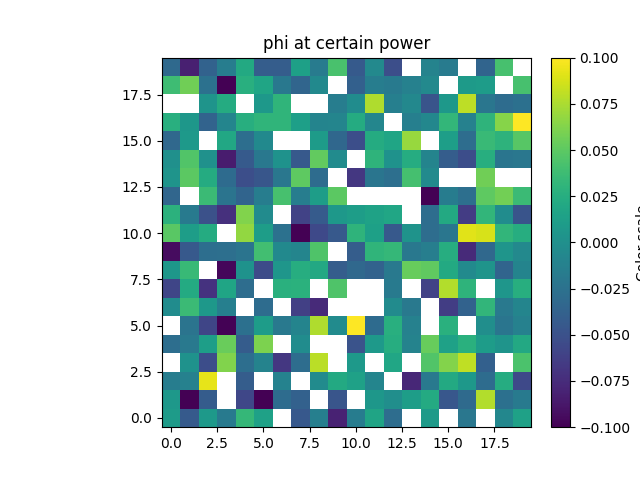

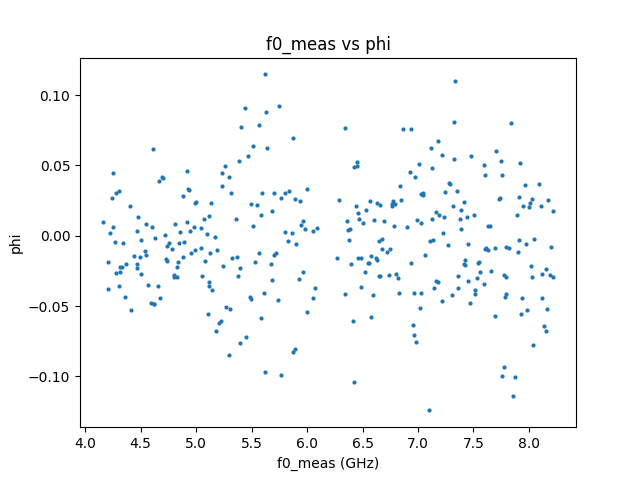

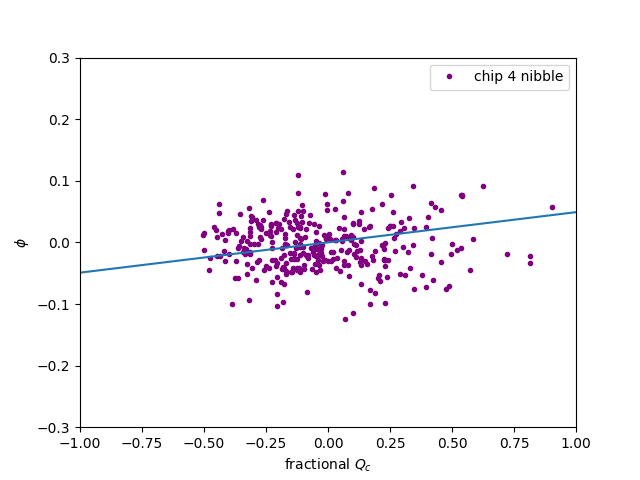

In [57]:
dw = pd.to_numeric(extended_master_array[:, 15], errors='coerce')
f0_meas = pd.to_numeric(extended_master_array[:, 6], errors='coerce')
Ql_meas = pd.to_numeric(extended_master_array[:, 12], errors='coerce')

f0_meas = f0_meas[mask] 
Ql_meas = Ql_meas[mask]
dw = dw[mask]

def reconstruct_array_with_nan(mask, filtered_array):
    full_array = np.full(mask.shape, np.nan)  # Maak array gevuld met nan
    full_array[mask] = filtered_array
    return full_array

# Aanname: valid_mask is van lengte 400
f0_meas = reconstruct_array_with_nan(mask, f0_meas)
Ql_meas = reconstruct_array_with_nan(mask, Ql_meas)
dw = reconstruct_array_with_nan(mask, dw)



mask_phi = np.isnan(f0_meas) & np.isnan(Ql_meas) & np.isnan(dw)
phi_400 = np.full_like(f0_meas, np.nan)
w_0 = 2 * np.pi * f0_meas[~mask_phi]  
phi = np.arctan(2*Ql_meas[~mask_phi] *(dw[~mask_phi] / w_0))

# print(phi)
# print(np.shape(phi))

phi_400[~mask_phi] = phi
# print(np.shape(phi_400))
# print(phi_400)


fig,ax = plt.subplots()
im = ax.imshow(phi_400[kid_id_board], cmap='viridis', origin='lower', vmin=-1e-1, vmax=1e-1)
ax.set_title('phi at certain power')
cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.05, pad=0.04)
cbar.set_label("Color scale")


fig,ax = plt.subplots()
plt.plot(f0_meas[~mask_phi],phi, 'o', markersize=2)
plt.xlabel('f0_meas (GHz)') 
plt.ylabel('phi')
plt.title('f0_meas vs phi')

correlation_matrix = np.corrcoef(phi, frac_Qc[~mask_phi])
# Extract the correlation coefficient
correlation = correlation_matrix[0, 1]
print(correlation)
x = np.linspace(-1,3,len(phi))
fig,ax = plt.subplots()
plt.plot(frac_Qc[~mask_phi],phi, 'o', markersize=3, label = 'chip 4 nibble', color = 'purple')
plt.plot(x,x*correlation)
plt.xlabel('fractional $Q_c$') 
plt.ylabel('$\phi$')
#plt.title('fractional $Q_c$ vs phi')
plt.xlim(-1,1)
plt.ylim(-0.3,0.3)
plt.legend()
plt.savefig('frac Qc vs phi chip 4 nibble')


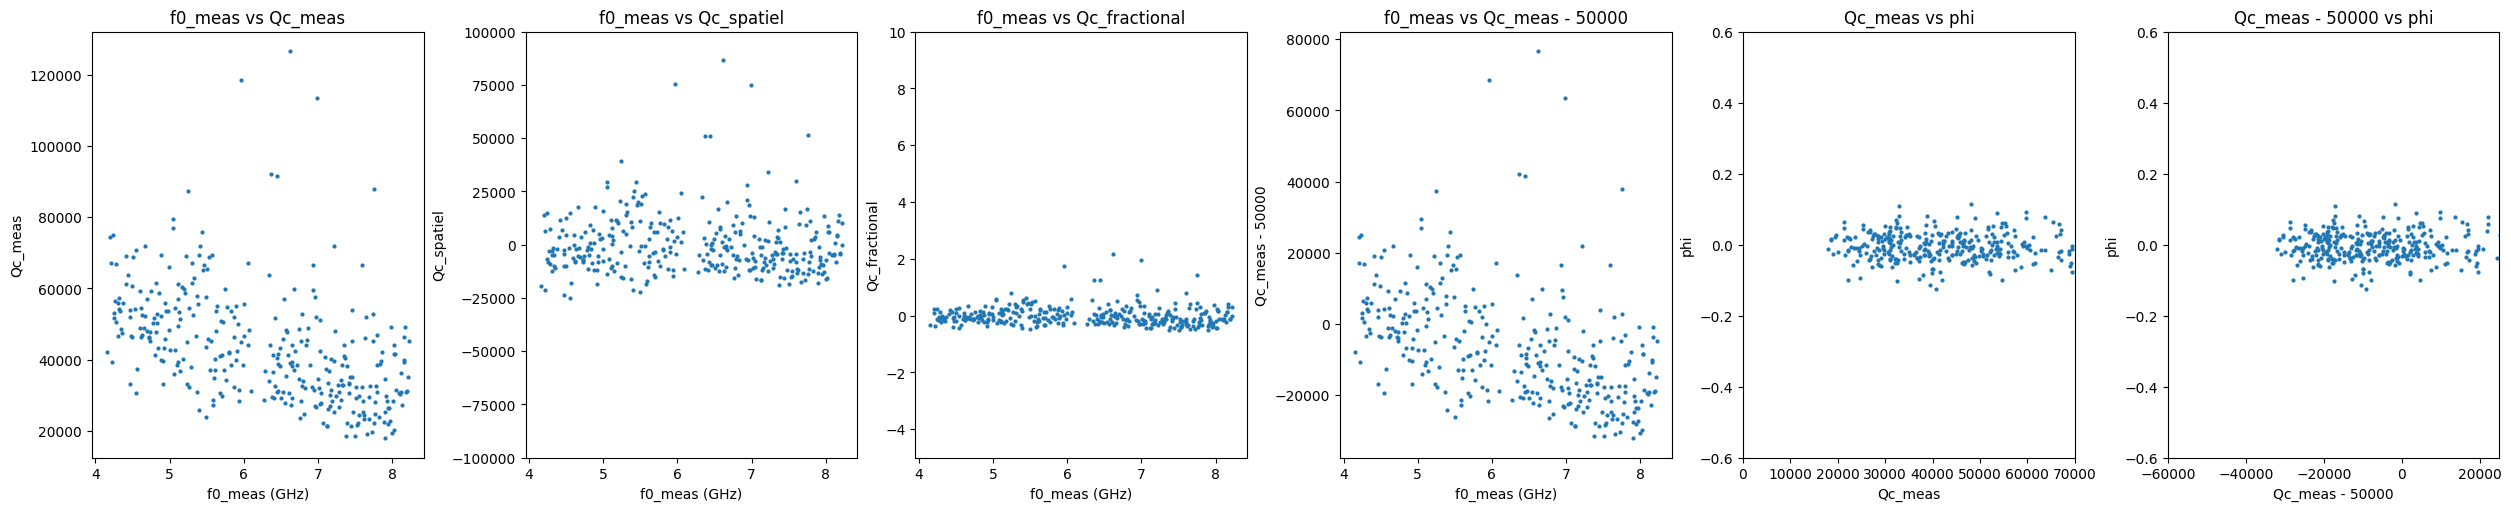

In [58]:
fig, axes = plt.subplots(1, 6, figsize=(25, 5), constrained_layout=True)

im0 = axes[0].plot(f0_meas, Qc_meas, 'o', markersize=2, label='Qc_meas')
axes[0].set_xlabel('f0_meas (GHz)')
axes[0].set_ylabel('Qc_meas')
#axes[0].set_ylim(-50000, 100000)
axes[0].set_title('f0_meas vs Qc_meas')

im1 = axes[1].plot(f0_meas, Qc_spatiel, 'o', markersize=2, label='Qc_spatiel')
axes[1].set_xlabel('f0_meas (GHz)')
axes[1].set_ylabel('Qc_spatiel')
axes[1].set_ylim(-100000, 100000)
axes[1].set_title('f0_meas vs Qc_spatiel')


im2 = axes[2].plot(f0_meas, frac_Qc, 'o', markersize=2, label='Qc_fractional')
axes[2].set_xlabel('f0_meas (GHz)')
axes[2].set_ylabel('Qc_fractional')
axes[2].set_ylim(-5, 10)
axes[2].set_title('f0_meas vs Qc_fractional')

Q_scatter = Qc_meas - 50000
mask_Q = np.isnan(f0_meas)
im3 =axes[3].plot(f0_meas, Q_scatter, 'o', markersize=2, label='Qc_meas - 50000')
axes[3].set_xlabel('f0_meas (GHz)')
axes[3].set_ylabel('Qc_meas - 50000')
# axes[3].set_ylim(-100000, 100000)
axes[3].set_title('f0_meas vs Qc_meas - 50000')


im4 =axes[4].plot(Qc_meas[~mask_Q], phi, 'o', markersize=2, label='Qc_meas')
axes[4].set_ylabel('phi')
axes[4].set_xlabel('Qc_meas')
axes[4].set_ylim(-0.6, 0.6)
axes[4].set_xlim(0, 70000)
axes[4].set_title('Qc_meas vs phi')

im5 =axes[5].plot(Q_scatter[~mask_Q], phi, 'o', markersize=2, label='Qc_meas - 50000')
axes[5].set_ylabel('phi')
axes[5].set_xlabel('Qc_meas - 50000')
axes[5].set_ylim(-0.6, 0.6)
axes[5].set_xlim(-60000, 25000 )
axes[5].set_title('Qc_meas - 50000 vs phi')

# im3 = axes[3].plot(f0_meas, Ql_meas, 'o', markersize=2, label='Ql_meas')
# axes[3].set_xlabel('f0_meas (GHz)')
# axes[3].set_ylabel('Ql_meas')
# axes[3].set_ylim(-50000, 100000)
# axes[3].set_title('f0_meas vs Ql_meas')




# Save the figure to a buffer
buf = io.BytesIO()
fig.savefig(buf, format='png', bbox_inches='tight')
buf.seek(0)
encoded = base64.b64encode(buf.read()).decode('utf-8')

# Create a scrollable HTML container for the image
html = f'''
<div style="overflow-x: auto; white-space: nowrap; width:2000px; height:800px border:1px solid #ccc; padding:10px;">
    <img src="data:image/png;base64,{encoded}" style="display: inline-block;" />
</div>
'''

display(HTML(html))
plt.close(fig)  


In [59]:
# # correlations with phi
# Qc_meas = Qc_meas.astype(float)
# phi = phi.astype(float)
# print(phi.shape, Qc_meas.shape)
# mask = ~np.isnan(Qc_meas) & ~np.isnan(phi)
# Qc_meas, Qi_meas = Qc_meas[mask], phi[mask]


# correlation_matrix = np.corrcoef(phi, Qc_meas)
# correlation_Q = np.correlate(phi, Qc_meas)
# print(correlation_Q)

# # Extract the correlation coefficient
# correlation = correlation_matrix[0, 1]
# print(correlation)

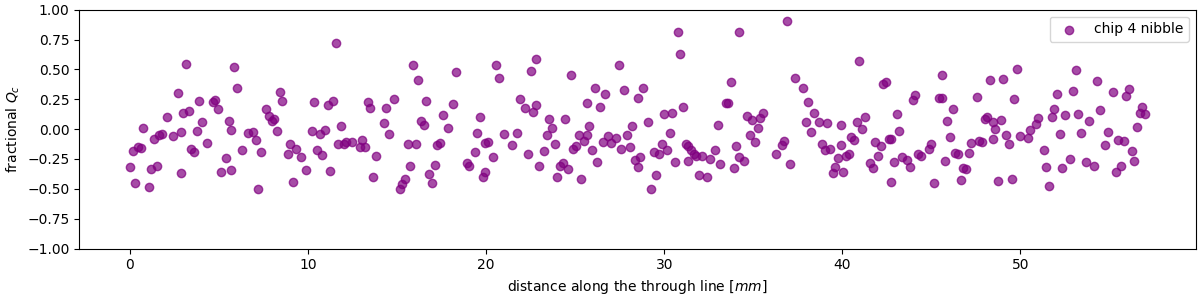

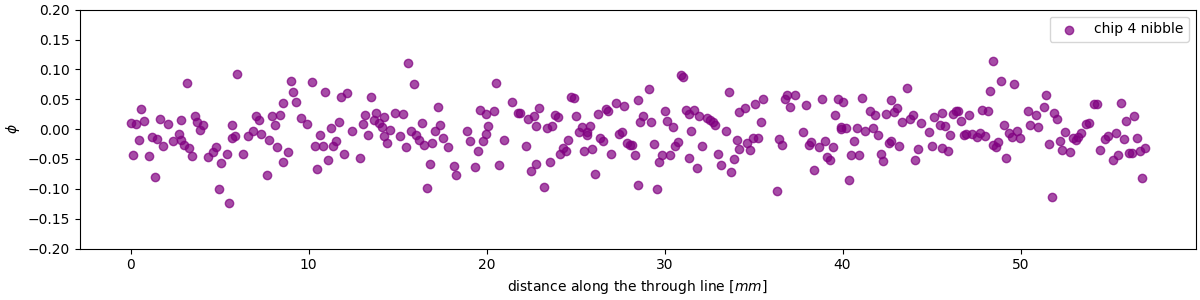

In [60]:
fig, ax = plt.subplots(figsize=(12,3), constrained_layout=True)
M =20
N = 20
pp = 150
d = np.arange(0,M*pp, pp)
dmap = np.zeros((M,N))
times = 0 
for i, row in enumerate(dmap):
    if i ==0:
        row += d
    if i !=0:
        if i % 2 == 0:
            row += dmap[i-1,0]+ d
        else:
            row += dmap[i-1,-1] + d[::-1]
dmap
ax.scatter(dmap.flatten()*1e-3, frac_Qc[kid_id_board].flatten(), label = 'chip 4 nibble', color = 'purple', alpha = 0.7)
ax.set_xlabel('distance along the through line [$mm$]')
ax.set_ylabel('fractional $Q_c$')
ax.set_ylim(-1,1)
ax.legend()
fig.savefig('flattenKIDid_chip4nibble', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots(figsize=(12,3), constrained_layout=True)
M =20
N = 20
pp = 150
d = np.arange(0,M*pp, pp)
dmap = np.zeros((M,N))
times = 0 
for i, row in enumerate(dmap):
    if i ==0:
        row += d
    if i !=0:
        if i % 2 == 0:
            row += dmap[i-1,0]+ d
        else:
            row += dmap[i-1,-1] + d[::-1]
dmap
ax.scatter(dmap.flatten()*1e-3, phi_400[kid_id_board].flatten(), label = 'chip 4 nibble', color = 'purple', alpha = 0.7)
ax.set_xlabel('distance along the through line [$mm$]')
ax.set_ylabel('$\phi$')
ax.set_ylim(-0.2,0.2)
ax.legend()
fig.savefig('flattenKIDid_chip4nibble_phi', bbox_inches='tight', dpi=300)